# <font color='#0000BB'> PMDM | Group Project - 06 </font> <a class="anchor" id="import"></a>

## <font color='#0069222'> Importing Libraries and Data</font> <a class="anchor" id="import"></a>

#### Import libraries

In [229]:
!pip install pydotplus
!pip install graphviz

In [230]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import colorama
from colorama import Fore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
import collections

import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


# synthetic classification dataset
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.svm import SVC

#### Defining Functions for later usage

In [231]:
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=15)
    # create lists to store the results from the different neural networks 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, Y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, Y_train)
        # check the mean accuracy for the test
        value_val = model.score(X_val,Y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

In [232]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

#### Plot configurations

In [233]:
plots_Title_fontSize = 14
subPlots_label_fontSize = 10
plots_barTexts_fontSize = 8

#### Import Train and Test datasets

In [234]:
#train = pd.read_csv(r'Data\espionage_data.csv')
#test = pd.read_csv(r'Data\espionage_data_test.csv')


train = pd.read_csv(r'espionage_data.csv')
test = pd.read_csv(r'espionage_data_test.csv')

<b><font size="6">1. Data Exploration</font></b><br><br>

In [235]:
#Top 10 rows, to have a general look of the data
train.head(10)

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,No involvement,No,City,Never,7000
1,1001,461212,Female,No,30,No,Low,6.0,0,1.0,Nothing,No involvement,No,City,Never,19610
2,1002,466216,Male,No,29,No,Low,4.0,0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,1003,462613,Female,Yes,35,No,Average,5.0,0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,Strong involvement,No,City,Never,8261
5,1005,466716,Female,Yes,79,Yes,Low,1.0,1,8.0,Self-employed,No involvement,No,City,Never,8261
6,1006,466512,Female,No,22,No,Low,2.0,0,2.0,Private company,Some involvement,No,City,Never,8261
7,1007,466144,Female,Yes,48,No,Low,NaN,1,NaN,Private company,Unknown,NaN,NaN,NaN,7000
8,1008,466799,Female,No,19,No,Low,3.0,0,1.0,Private company,Some involvement,No,City,Never,9522
9,1009,465043,Male,Yes,48,Yes,Average,5.0,1,1.0,Government,No involvement,No,City,Never,18349


In [236]:
#check if id is unique
print("train has ID_ORIGINAL unique? Answer:" , train["ID_ORIGINAL"].is_unique)

print(str(train.shape[0]) + " unique users")

train has ID_ORIGINAL unique? Answer: True
8000 unique users


In [237]:
#Create a vector of the numerical variables 
numerical= ['Age','Household_Size','Satisfaction_Level','Household_Income']

In [238]:
# Loading the dataset and visualizing summary statistics of the numerical variables
DescribeNtrain=train.describe().T

#data types
DescribeNtrain['dtype'] = train.dtypes
#null count
DescribeNtrain['null count'] = train.isnull().sum()

DescribeNtrain

,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,8000.0,4999.500000,2309.545410,1000.0,2999.75,4999.5,6999.25,8999.0,int64,0
ID_ORIGINAL,8000.0,463456.462250,2585.043875,458982.0,461226.75,463448.5,465716.25,467974.0,int64,0
Age,8000.0,43.576625,16.704319,18.0,31.00,41.0,53.00,89.0,int64,0
Household_Size,7670.0,2.844329,1.527431,1.0,2.00,3.0,4.00,9.0,float64,330
Spy,8000.0,0.477625,0.499530,0.0,0.00,0.0,1.00,1.0,int64,0
Satisfaction_Level,7670.0,2.641851,1.711686,1.0,1.00,2.0,4.00,9.0,float64,330
Household_Income,8000.0,9985.575125,4190.830154,7000.0,7000.00,8261.0,12044.00,24654.0,int64,0


In [239]:
# Loading the dataset and visualizing summary statistics of the numerical variables
DescribeNtest=test.describe().T

#data types
DescribeNtest['dtype'] = test.dtypes
#null count
DescribeNtest['null count'] = test.isnull().sum()

DescribeNtest

,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,493.0,9246.000000,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0,int64,0
ID_ORIGINAL,493.0,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0,int64,0
Age,493.0,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0,int64,0
Household_Size,476.0,2.955882,1.592134,1.0,2.0,3.0,4.0,9.0,float64,17
Satisfaction_Level,476.0,2.493697,1.599330,1.0,1.0,2.0,3.0,9.0,float64,17
Household_Income,457.0,3123.527352,3948.088253,0.0,0.0,1261.0,5044.0,17654.0,float64,36


In [240]:
# Loading the dataset and visualizing summary statistics of the numerical variables
DescribeNtest=test.describe().T

#data types
DescribeNtest['dtype'] = test.dtypes
#null count
DescribeNtest['null count'] = test.isnull().sum()

DescribeNtest

,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,493.0,9246.000000,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0,int64,0
ID_ORIGINAL,493.0,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0,int64,0
Age,493.0,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0,int64,0
Household_Size,476.0,2.955882,1.592134,1.0,2.0,3.0,4.0,9.0,float64,17
Satisfaction_Level,476.0,2.493697,1.599330,1.0,1.0,2.0,3.0,9.0,float64,17
Household_Income,457.0,3123.527352,3948.088253,0.0,0.0,1261.0,5044.0,17654.0,float64,36


In [241]:
# Loading the dataset and visualizing summary statistics of the categorical variables 
DescribeCtrain=train.describe(include = ['O']).T

#data types
DescribeCtrain['dtype'] = train.dtypes
#null count
DescribeCtrain['null count'] = train.isnull().sum()

DescribeCtrain

,count,unique,top,freq,dtype,null count
Gender,8000,2,Male,4392,object,0
Foreign_Citizenship,7862,2,Yes,4632,object,138
Frequent_Traveler,7923,2,Yes,4938,object,77
Cellphone_Usage,8000,3,Low,4815,object,0
Occupation,7876,6,Private company,5444,object,124
Political_Participation,7876,4,No involvement,3125,object,124
Social_Person,7924,2,No,5211,object,76
Area_Residence,7924,2,City,6838,object,76
Military_Service,7924,4,Never,7537,object,76


In [242]:
# Loading the dataset and visualizing summary statistics of the numerical variables
DescribeCtest=test.describe(include = ['O']).T

#data types
DescribeCtest['dtype'] = test.dtypes
#null count
DescribeCtest['null count'] = test.isnull().sum()

DescribeCtest

,count,unique,top,freq,dtype,null count
Gender,493,2,Male,248,object,0
Foreign_Citizenship,486,2,Yes,270,object,7
Frequent_Traveler,490,2,Yes,306,object,3
Cellphone_Usage,493,3,Low,305,object,0
Occupation,489,6,Private company,349,object,4
Political_Participation,489,4,No involvement,178,object,4
Social_Person,485,2,No,305,object,8
Area_Residence,485,2,City,432,object,8
Military_Service,485,4,Never,426,object,8


In [243]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8000.0,NaN,NaN,NaN,4999.5,2309.54541,1000.0,2999.75,4999.5,6999.25,8999.0
ID_ORIGINAL,8000.0,NaN,NaN,NaN,463456.46225,2585.043875,458982.0,461226.75,463448.5,465716.25,467974.0
Gender,8000,2,Male,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,7862,2,Yes,4632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8000.0,NaN,NaN,NaN,43.576625,16.704319,18.0,31.0,41.0,53.0,89.0
Frequent_Traveler,7923,2,Yes,4938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,8000,3,Low,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7670.0,NaN,NaN,NaN,2.844329,1.527431,1.0,2.0,3.0,4.0,9.0
Spy,8000.0,NaN,NaN,NaN,0.477625,0.49953,0.0,0.0,0.0,1.0,1.0
Satisfaction_Level,7670.0,NaN,NaN,NaN,2.641851,1.711686,1.0,1.0,2.0,4.0,9.0


In [244]:
train[(train["Spy"]==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,3821.0,NaN,NaN,NaN,4954.042659,2307.639374,1000.0,2939.0,4916.0,6915.0,8999.0
ID_ORIGINAL,3821.0,NaN,NaN,NaN,463547.62235,2594.012552,458982.0,461476.0,463623.0,465767.0,467974.0
Gender,3821,2,Male,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,3767,2,Yes,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,3821.0,NaN,NaN,NaN,48.730175,14.670275,18.0,38.0,47.0,58.0,89.0
Frequent_Traveler,3788,2,Yes,2936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,3821,3,Low,1540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,3734.0,NaN,NaN,NaN,2.838243,1.39709,1.0,2.0,2.0,4.0,9.0
Spy,3821.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Satisfaction_Level,3734.0,NaN,NaN,NaN,2.72737,1.515211,1.0,2.0,2.0,3.0,9.0


In [245]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,493.0,NaN,NaN,NaN,9246.0,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0
ID_ORIGINAL,493.0,NaN,NaN,NaN,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0
Gender,493,2,Male,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,486,2,Yes,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,493.0,NaN,NaN,NaN,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0
Frequent_Traveler,490,2,Yes,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,493,3,Low,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,476.0,NaN,NaN,NaN,2.955882,1.592134,1.0,2.0,3.0,4.0,9.0
Satisfaction_Level,476.0,NaN,NaN,NaN,2.493697,1.59933,1.0,1.0,2.0,3.0,9.0
Occupation,489,6,Private company,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
#Dropping the ID's to analyze correlations
train_corr=train.drop(['ID', 'ID_ORIGINAL'], axis = 1)

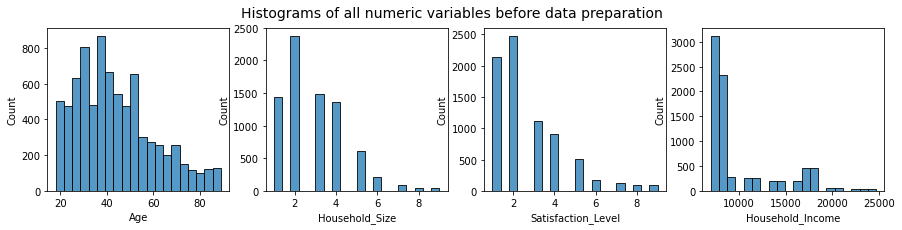

In [247]:
#What is the behavior of numeric variables

fig, ax = plt.subplots(1, 4, figsize=(15,3))
for var, subplot in zip(train_corr[numerical], ax.flatten()):
    g = sns.histplot(data=train_corr[numerical],
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)
fig.suptitle("Histograms of all numeric variables before data preparation", fontsize=plots_Title_fontSize);

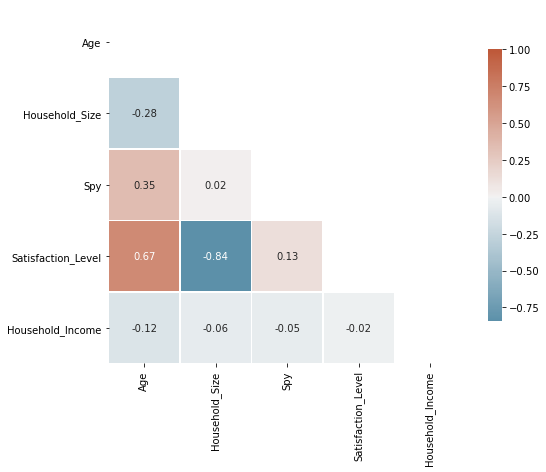

In [248]:
## Spearman Correlations and respective heatmap
corr = round(train_corr.corr(method='spearman'),2)

cmap = sns.diverging_palette(230, 22, as_cmap=True)
f, ax = plt.subplots(figsize=(8,10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,vmax=1,center=0,square=True,
linewidth=0.5,cbar_kws={'shrink': .5})

plt.show()

Correlation between Satisfaction_Level e Household_Size


AxesSubplot(0.125,0.125;0.775x0.755)


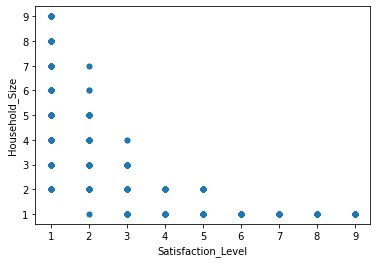

In [249]:
#Que tipo de correlação podemos ver entre as variaveis Satisfaction_Level e Household_Size
print("Correlation between Satisfaction_Level e Household_Size")
print('\n')
print(train.plot(x='Satisfaction_Level', y='Household_Size', kind='scatter'))

<b><font size="6">2. Data Preprocessing</font></b><br><br>

In [250]:
train.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size', 'Spy',
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income'],
      dtype='object')

In [251]:
test.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size',
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income'],
      dtype='object')

### 2.1 Outliers

Text(0.5, 0.98, 'Boxplots of Numerical variables')

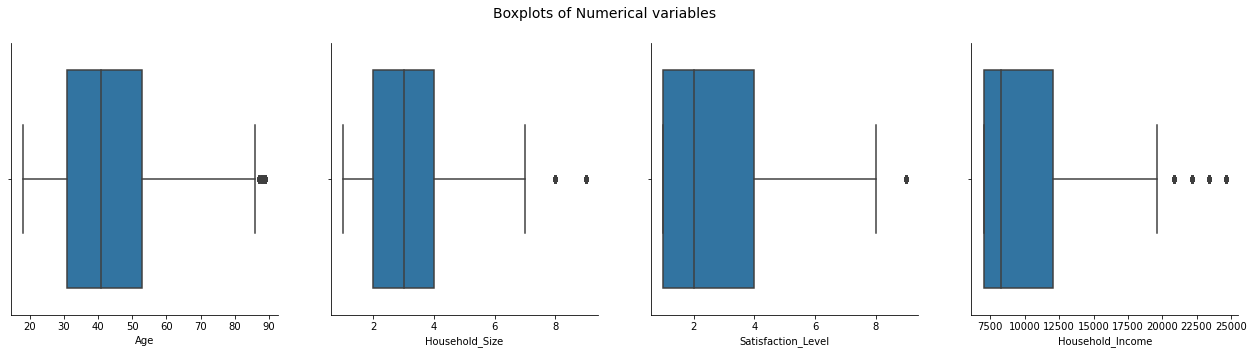

In [252]:
#Update vector of the numerical variables 
numerical= ['Age','Household_Size','Satisfaction_Level','Household_Income']



# Draw
fig, ax = plt.subplots(1, 4, figsize=(22,5))
for var, subplot in zip(train[numerical], ax.flatten()):
    g = sns.boxplot(data=train,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of Numerical variables", fontsize=plots_Title_fontSize)

Text(0.5, 0.98, 'Boxplots of Numerical variables')

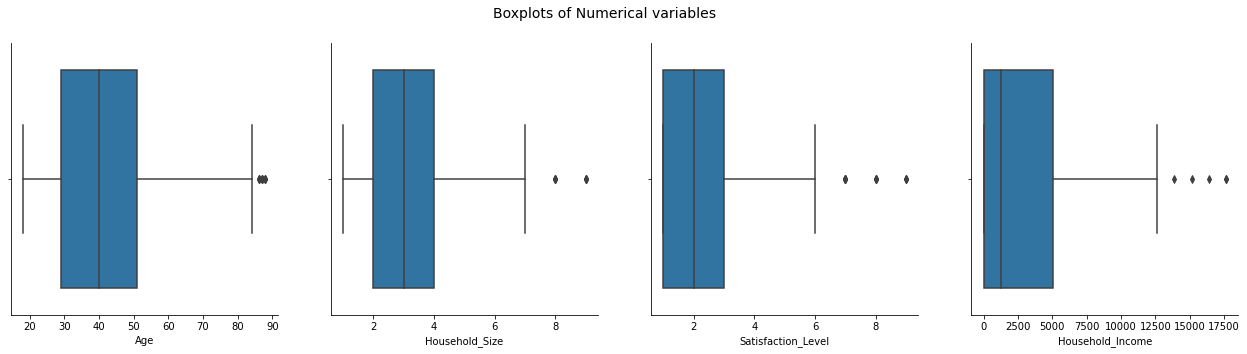

In [253]:
#Update vector of the numerical variables 
numerical= ['Age','Household_Size','Satisfaction_Level','Household_Income']



# Draw
fig, ax = plt.subplots(1, 4, figsize=(22,5))
for var, subplot in zip(test[numerical], ax.flatten()):
    g = sns.boxplot(data=test,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of Numerical variables", fontsize=plots_Title_fontSize)

#### Removing outliers in the beginning 
##### We analyzed the outliers and the model before removing. We do need to remove before the split 

In [254]:
#remove Household_Size >= 8 
#train.drop(train[train['Household_Size'] >= 8].index, inplace = True)

#remove Age >= 8 
train.drop(train[train['Age'] >= 87].index, inplace = True)

#remove Household_Income >= 20000
#train.drop(train[train['Household_Income'] >= 20000].index, inplace = True)

In [255]:
train.shape

(7901, 16)

<AxesSubplot:>

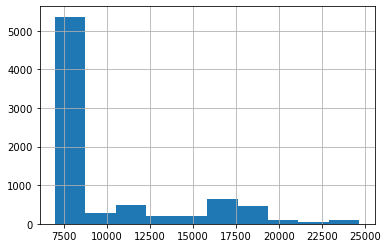

In [256]:
train['Household_Income'].hist()

<AxesSubplot:>

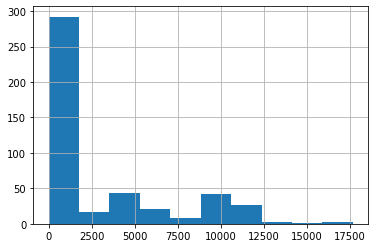

In [257]:
test['Household_Income'].hist()

Text(0.5, 0.98, 'Boxplots of Numerical variables')

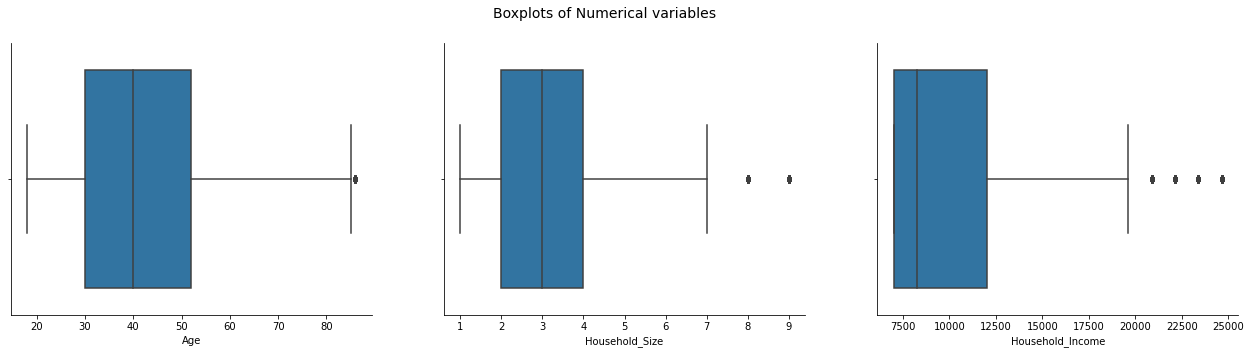

In [258]:
#Update vector of the numerical variables 
numerical= ['Age','Household_Size','Household_Income']



# Draw
fig, ax = plt.subplots(1, 3, figsize=(22,5))
for var, subplot in zip(train[numerical], ax.flatten()):
    g = sns.boxplot(data=train,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of Numerical variables", fontsize=plots_Title_fontSize)

### 2.2 Missing values

In [259]:
Income_nulls=test[(test["Household_Income"].isnull())]
Income_nulls

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
7,9007,462799,Male,No,26,No,Low,NaN,NaN,Private company,Some involvement,Yes,City,Intervention in Libya,NaN
75,9075,459144,Male,Yes,80,Yes,High,2.0,4.0,Self-employed,No involvement,No,City,Never,NaN
80,9080,459293,Male,No,21,No,Low,NaN,NaN,Private company,Some involvement,Yes,City,Intervention in Syria,NaN
81,9081,459354,Female,Yes,50,Yes,High,3.0,2.0,Private company,Unknown,No,City,Never,NaN
82,9082,459361,Female,No,32,Yes,Low,2.0,2.0,Private company,No involvement,No,City,Never,NaN
85,9085,459458,Male,No,33,No,Low,NaN,NaN,Student,No involvement,No,City,Never,NaN
87,9087,459505,Female,No,42,Yes,Low,1.0,5.0,Private company,No involvement,No,City,Never,NaN
93,9093,459608,Female,No,62,Yes,Low,1.0,7.0,Government,No involvement,No,City,Never,NaN
94,9094,459612,Male,No,21,No,Low,2.0,2.0,Private company,Some involvement,No,City,Never,NaN
98,9098,459785,Female,No,32,Yes,Low,1.0,4.0,Private company,No involvement,Yes,City,Never,NaN


##### Missing values found on test and not on train data set. Treating the household income nulls

In [260]:
test['Household_Income'] = test['Household_Income'].replace(np.nan,round(train['Household_Income'].median(),2)) 

In [261]:
test[test['ID_ORIGINAL'].isin(Income_nulls["ID_ORIGINAL"].tolist())]

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
7,9007,462799,Male,No,26,No,Low,NaN,NaN,Private company,Some involvement,Yes,City,Intervention in Libya,8261.0
75,9075,459144,Male,Yes,80,Yes,High,2.0,4.0,Self-employed,No involvement,No,City,Never,8261.0
80,9080,459293,Male,No,21,No,Low,NaN,NaN,Private company,Some involvement,Yes,City,Intervention in Syria,8261.0
81,9081,459354,Female,Yes,50,Yes,High,3.0,2.0,Private company,Unknown,No,City,Never,8261.0
82,9082,459361,Female,No,32,Yes,Low,2.0,2.0,Private company,No involvement,No,City,Never,8261.0
85,9085,459458,Male,No,33,No,Low,NaN,NaN,Student,No involvement,No,City,Never,8261.0
87,9087,459505,Female,No,42,Yes,Low,1.0,5.0,Private company,No involvement,No,City,Never,8261.0
93,9093,459608,Female,No,62,Yes,Low,1.0,7.0,Government,No involvement,No,City,Never,8261.0
94,9094,459612,Male,No,21,No,Low,2.0,2.0,Private company,Some involvement,No,City,Never,8261.0
98,9098,459785,Female,No,32,Yes,Low,1.0,4.0,Private company,No involvement,Yes,City,Never,8261.0


#### Removing rows with 3 columns that only have null in the beginning 
##### We analyzed the nulls and the model before removing. We do need to remove before the split 

In [262]:
train[(train["Social_Person"].isnull()) & (train["Area_Residence"].isnull()) & (train["Military_Service"].isnull() ) & (train["Spy"]==1)].count()

ID                         34
ID_ORIGINAL                34
Gender                     34
Foreign_Citizenship        33
Age                        34
Frequent_Traveler          34
Cellphone_Usage            34
Household_Size             30
Spy                        34
Satisfaction_Level         30
Occupation                 33
Political_Participation    33
Social_Person               0
Area_Residence              0
Military_Service            0
Household_Income           34
dtype: int64

In [263]:
train[(train["Social_Person"].isnull()) & (train["Spy"]==1)].count()

ID                         34
ID_ORIGINAL                34
Gender                     34
Foreign_Citizenship        33
Age                        34
Frequent_Traveler          34
Cellphone_Usage            34
Household_Size             30
Spy                        34
Satisfaction_Level         30
Occupation                 33
Political_Participation    33
Social_Person               0
Area_Residence              0
Military_Service            0
Household_Income           34
dtype: int64

In [264]:
train[(train["Area_Residence"].isnull()) & (train["Spy"]==1)].count() 

ID                         34
ID_ORIGINAL                34
Gender                     34
Foreign_Citizenship        33
Age                        34
Frequent_Traveler          34
Cellphone_Usage            34
Household_Size             30
Spy                        34
Satisfaction_Level         30
Occupation                 33
Political_Participation    33
Social_Person               0
Area_Residence              0
Military_Service            0
Household_Income           34
dtype: int64

In [265]:
train[(train["Military_Service"].isnull()) & (train["Spy"]==1)].count() 

ID                         34
ID_ORIGINAL                34
Gender                     34
Foreign_Citizenship        33
Age                        34
Frequent_Traveler          34
Cellphone_Usage            34
Household_Size             30
Spy                        34
Satisfaction_Level         30
Occupation                 33
Political_Participation    33
Social_Person               0
Area_Residence              0
Military_Service            0
Household_Income           34
dtype: int64

In [266]:
train[(train["Military_Service"].isnull())]

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
7,1007,466144,Female,Yes,48,No,Low,NaN,1,NaN,Private company,Unknown,NaN,NaN,NaN,7000
79,1079,462935,Male,Yes,79,No,Low,1.0,0,8.0,Private company,Strong involvement,NaN,NaN,NaN,8261
86,1086,462199,Female,No,33,No,Low,3.0,0,2.0,Private company,Some involvement,NaN,NaN,NaN,17088
88,1088,463484,Female,Yes,35,No,High,2.0,0,2.0,Private company,No involvement,NaN,NaN,NaN,8261
139,1139,462359,Male,Yes,51,Yes,Low,3.0,0,2.0,Private company,Strong involvement,NaN,NaN,NaN,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,8684,462262,Male,No,27,No,Low,3.0,1,1.0,Private company,Some involvement,NaN,NaN,NaN,8261
7712,8712,463981,Female,No,25,Yes,Low,1.0,1,3.0,Private company,Unknown,NaN,NaN,NaN,13305
7731,8731,460303,Female,No,43,Yes,Low,1.0,0,5.0,Private company,Unknown,NaN,NaN,NaN,9522
7899,8899,466006,Female,Yes,49,Yes,Low,2.0,1,3.0,Private company,Unknown,NaN,NaN,NaN,8261


In [267]:
#eliminar registos que têm Social_Person a null ... 76 rows
#whenever this one is null the other 2 are aswell
#train = train[train['Social_Person'].notna()]

In [268]:
train.shape

(7901, 16)

In [269]:
train.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size', 'Spy',
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income'],
      dtype='object')

In [270]:
test.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size',
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income'],
      dtype='object')

In [271]:
#Defining the variables as data and the dependent variable as target
data = train[['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size', 
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income']]
target = train['Spy']

In [272]:
X=data
Y=target

#### Create X_test for consistent nomenclature

In [273]:
X_test = test[['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage', 'Household_Size', 
       'Satisfaction_Level', 'Occupation', 'Political_Participation',
       'Social_Person', 'Area_Residence', 'Military_Service',
       'Household_Income']]


#X_test['Household_Income_Bins_(19500.0, inf]']=0
#Y_test = test[['ID', 'ID_ORIGINAL']]
#Y_test['Spy']=0

#Y_test=Y_test['Spy']

In [274]:
display(X)
display(Y)


#display(X_train)
#display(Y_train)

#display(X_val)
#display(Y_val)

display(X_test)
#display(Y_test)

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,1000,467329,Female,No,40,Yes,Low,1.0,4.0,Government,No involvement,No,City,Never,7000
1,1001,461212,Female,No,30,No,Low,6.0,1.0,Nothing,No involvement,No,City,Never,19610
2,1002,466216,Male,No,29,No,Low,4.0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,1003,462613,Female,Yes,35,No,Average,5.0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
4,1004,465709,Male,Yes,68,Yes,Average,2.0,4.0,Private company,Strong involvement,No,City,Never,8261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,8995,466246,Male,No,19,No,Low,4.0,1.0,Private company,Some involvement,Yes,City,Never,7000
7996,8996,461781,Male,Yes,57,Yes,Low,2.0,3.0,Private company,Unknown,No,City,Never,7000
7997,8997,465079,Male,Yes,75,Yes,Low,1.0,8.0,Self-employed,No involvement,No,City,Never,8261
7998,8998,465402,Male,No,31,No,Low,NaN,NaN,Private company,Some involvement,No,City,Never,7000


0       1
1       0
2       0
3       0
4       1
       ..
7995    0
7996    1
7997    0
7998    0
7999    1
Name: Spy, Length: 7901, dtype: int64

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,9000,460139,Male,No,26,No,Low,6.0,1.0,Private company,Unknown,Yes,City,Intervention in Libya,7566.0
1,9001,460648,Female,NaN,29,No,Low,1.0,3.0,Nothing,No involvement,Yes,City,Intervention in Libya,10088.0
2,9002,460835,Female,Yes,28,Yes,Low,1.0,3.0,Private company,Unknown,Yes,City,Intervention in Libya,0.0
3,9003,461613,Female,No,25,Yes,Low,4.0,1.0,Private company,Some involvement,Yes,City,Intervention in Libya,10088.0
4,9004,461721,Male,No,26,Yes,Low,5.0,1.0,Private company,Strong involvement,Yes,City,Intervention in Libya,8827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,9488,473596,Female,No,34,No,Low,5.0,1.0,Private company,Some involvement,NaN,NaN,NaN,1261.0
489,9489,477769,Male,Yes,62,Yes,Average,2.0,4.0,Government,No involvement,No,City,Never,0.0
490,9490,475292,Female,Yes,47,Yes,Average,3.0,2.0,Private company,Unknown,No,City,Never,6305.0
491,9491,472997,Female,Yes,51,Yes,Average,3.0,2.0,Nothing,No involvement,No,City,Never,11349.0


In [275]:
#Which columns have null and how many 

null_columns=X.columns[X.isnull().any()]
print("#TRAIN")
print(Fore.BLUE + 'Contagem' + Fore.BLACK)
print(X[null_columns].isnull().sum())
print('\n')
print(Fore.BLUE + 'Percentagem' + Fore.BLACK)
print(round(X[null_columns].isna().sum()/len(X[null_columns])*100))

#null_columns=X_train.columns[X_train.isnull().any()]
#print("#TRAIN")
#print(Fore.BLUE + 'Contagem' + Fore.BLACK)
#print(X_train[null_columns].isnull().sum())
#print('\n')
#print(Fore.BLUE + 'Percentagem' + Fore.BLACK)
#print(round(X_train[null_columns].isna().sum()/len(X_train[null_columns])*100))
#
#
#print('\n')
#print('\n')
#print("#VALIDATION")
#null_columns=X_val.columns[X_val.isnull().any()]
#
#print(Fore.BLUE + 'Contagem' + Fore.BLACK)
#print(X_val[null_columns].isnull().sum())
#print('\n')
#print(Fore.BLUE + 'Percentagem' + Fore.BLACK)
#print(round(X_val[null_columns].isna().sum()/len(X_val[null_columns])*100))



print('\n')
print('\n')
print("#TEST")
null_columns=X_test.columns[X_test.isnull().any()]

print(Fore.BLUE + 'Contagem' + Fore.BLACK)
print(X_test[null_columns].isnull().sum())
print('\n')
print(Fore.BLUE + 'Percentagem' + Fore.BLACK)
print(round(X_test[null_columns].isna().sum()/len(X_test[null_columns])*100))

#TRAIN
Contagem
Foreign_Citizenship        137
Frequent_Traveler           76
Household_Size             323
Satisfaction_Level         323
Occupation                 123
Political_Participation    123
Social_Person               75
Area_Residence              75
Military_Service            75
dtype: int64


Percentagem
Foreign_Citizenship        2.0
Frequent_Traveler          1.0
Household_Size             4.0
Satisfaction_Level         4.0
Occupation                 2.0
Political_Participation    2.0
Social_Person              1.0
Area_Residence             1.0
Military_Service           1.0
dtype: float64




#TEST
Contagem
Foreign_Citizenship         7
Frequent_Traveler           3
Household_Size             17
Satisfaction_Level         17
Occupation                  4
Political_Participation     4
Social_Person               8
Area_Residence              8
Military_Service            8
dtype: int64


Percentagem
Foreign_Citizenship        1.0
Frequent_Traveler          1.0
Househ

#### Removing vairable from every dataset with great correlation with other variables

In [276]:
#Before anything, there two numerical variables very correlated Household_Size and Satisfaction_Level 
#so we decided to drop the variable Satisfation_level, as this one is also the most correlated with other variables
#del X_train['Satisfaction_Level']
#del X_val['Satisfaction_Level']


del X_test['Satisfaction_Level']

#del X_test['Household_Size']


del X['Satisfaction_Level']

#del X['Household_Size']



In [277]:
X.describe(include='all')

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
count,7901.000000,7901.000000,7901,7764,7901.000000,7825,7901,7578.000000,7778,7778,7826,7826,7826,7901.000000
unique,NaN,NaN,2,2,NaN,2,3,NaN,6,4,2,2,4,NaN
top,NaN,NaN,Male,Yes,NaN,Yes,Low,NaN,Private company,No involvement,No,City,Never,NaN
freq,NaN,NaN,4344,4539,NaN,4879,4770,NaN,5431,3040,5120,6742,7439,NaN
mean,4998.396785,463457.828629,NaN,NaN,43.018985,NaN,NaN,2.856954,NaN,NaN,NaN,NaN,NaN,10009.258955
std,2308.481141,2583.287500,NaN,NaN,16.043427,NaN,NaN,1.530429,NaN,NaN,NaN,NaN,NaN,4203.513436
min,1000.000000,458982.000000,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,7000.000000
25%,2999.000000,461228.000000,NaN,NaN,30.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,7000.000000
50%,5001.000000,463446.000000,NaN,NaN,40.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,8261.000000
75%,6995.000000,465718.000000,NaN,NaN,52.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12044.000000


#### Replacing nulls in 2 datasets 

In [278]:
#null_columns=X_train.columns[X_train.isnull().any()]
null_columns=X.columns[X.isnull().any()]

# Create a copy of the dataframe


#copiedtrain = X_train.copy(deep=True)
copiedtrain = X.copy(deep=True)


# What are the unique values of each column that has nulls ?
# Fazer count
for i in range(len(null_columns)):
    print(copiedtrain.groupby(null_columns[i], sort=True)['ID'].count())
    print('\n')


Foreign_Citizenship
No     3225
Yes    4539
Name: ID, dtype: int64


Frequent_Traveler
No     2946
Yes    4879
Name: ID, dtype: int64


Household_Size
1.0    1413
2.0    2332
3.0    1471
4.0    1363
5.0     606
6.0     207
7.0      95
8.0      48
9.0      43
Name: ID, dtype: int64


Occupation
Government          679
Nothing             243
Private company    5431
Public company      587
Self-employed       552
Student             286
Name: ID, dtype: int64


Political_Participation
No involvement        3040
Some involvement      1304
Strong involvement     940
Unknown               2494
Name: ID, dtype: int64


Social_Person
No     5120
Yes    2706
Name: ID, dtype: int64


Area_Residence
City            6742
Country-side    1084
Name: ID, dtype: int64


Military_Service
Intervention in Iraq      201
Intervention in Libya      55
Intervention in Syria     131
Never                    7439
Name: ID, dtype: int64




##### Replace Numerical

In [279]:
#TRAIN
#replace null of Household_Size with random size from our dataset
#como se trata de espaço, e são valores inteiros, faz me sentido serem substituidos aleatoriamente.

#train_1=X_train[X_train['Household_Size'].isnull()]
#for i in train_1.index: 
    #X_train.at[i,'Household_Size']=np.random.randint(X_train['Household_Size'].min(),X_train.loc[:,'Household_Size'].max())
    
#replace   null of Household_Size for mean
X['Household_Size'] = X['Household_Size'].replace(np.nan,round(X['Household_Size'].mean(),0)) 

#X['Satisfaction_Level'] = X['Satisfaction_Level'].replace(np.nan,0) 
#X['Household_Size'] = X['Household_Size'].replace(np.nan,0) 

#print('\n')
#print("#TRAIN - Replaced Household_Size with mean")

In [280]:
#VALIDATION

#val_1=X_val[X_val['Household_Size'].isnull()]
#for i in val_1.index: 
    #X_val.at[i,'Household_Size']=np.random.randint(X_train['Household_Size'].min(),X_train.loc[:,'Household_Size'].max())
    
#replace   null of Household_Size for mean
#X_val['Household_Size'] = X_val['Household_Size'].replace(np.nan,X_train['Household_Size'].mean())
#print('\n')
#print("#VALIDATION - Replaced Household_Size with mean of the TRAIN dataset")

In [281]:
#TEST

#test_1=X_test[X_test['Household_Size'].isnull()]
#for i in test_1.index: 
    #X_test.at[i,'Household_Size']=np.random.randint(X_train['Household_Size'].min(),X_train.loc[:,'Household_Size'].max())
    
#replace   null of Household_Size for mean
X_test['Household_Size'] = X_test['Household_Size'].replace(np.nan,round(X['Household_Size'].mean(),0)) 


#X_test['Satisfaction_Level'] = X_test['Satisfaction_Level'].replace(np.nan,0) 
#X_test['Household_Size'] = X_test['Household_Size'].replace(np.nan,0) 
print('\n')
print("#TEST - Replaced Household_Size with mean of the TRAIN dataset")



#TEST - Replaced Household_Size with mean of the TRAIN dataset


In [282]:
# Verificar como ficou o dataset e se a variavel ainda tem nulos

#print(X_train.groupby(X_train['Household_Size'], sort=True)['ID'].count())
print(X.groupby(X['Household_Size'], sort=True)['ID'].count())

print('\n')
print('Are there any nulls in TRAIN? ...' ,X['Household_Size'].isnull().sum())
#print('Are there any nulls in TRAIN? ...' ,X_train['Household_Size'].isnull().sum())
#print('Are there any nulls in VALIDATION? ...' ,X_val['Household_Size'].isnull().sum())
print('Are there any nulls in TEST? ...' ,X_test['Household_Size'].isnull().sum())

Household_Size
1.0    1413
2.0    2332
3.0    1794
4.0    1363
5.0     606
6.0     207
7.0      95
8.0      48
9.0      43
Name: ID, dtype: int64


Are there any nulls in TRAIN? ... 0
Are there any nulls in TEST? ... 0


In [283]:
#print(X_train.shape)
print(X.shape)
print('\n')


#DescribeNtrain=X_train.describe().T
DescribeNtrain=X.describe().T

#data types
#DescribeNtrain['dtype'] = X_train.dtypes
#null count
#DescribeNtrain['null count'] = X_train.isnull().sum()

#data types
DescribeNtrain['dtype'] = X.dtypes
#null count
DescribeNtrain['null count'] = X.isnull().sum()


DescribeNtrain

(7901, 14)




,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,7901.0,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0,int64,0
ID_ORIGINAL,7901.0,463457.828629,2583.287500,458982.0,461228.0,463446.0,465718.0,467974.0,int64,0
Age,7901.0,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0,int64,0
Household_Size,7901.0,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0,float64,0
Household_Income,7901.0,10009.258955,4203.513436,7000.0,7000.0,8261.0,12044.0,24654.0,int64,0


In [284]:
#print(X_train.shape)
print(X_test.shape)
print('\n')


#DescribeNtrain=X_train.describe().T
DescribeNtest=X_test.describe().T

#data types
#DescribeNtrain['dtype'] = X_train.dtypes
#null count
#DescribeNtrain['null count'] = X_train.isnull().sum()

#data types
DescribeNtest['dtype'] = X_test.dtypes
#null count
DescribeNtest['null count'] = X_test.isnull().sum()


DescribeNtest

(493, 14)




,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,493.0,9246.000000,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0,int64,0
ID_ORIGINAL,493.0,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0,int64,0
Age,493.0,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0,int64,0
Household_Size,493.0,2.957404,1.564407,1.0,2.0,3.0,4.0,9.0,float64,0
Household_Income,493.0,3498.677485,4029.525595,0.0,0.0,1261.0,6305.0,17654.0,float64,0


##### Replace Categorical

In [285]:
#null_columns=X_train.columns[X_train.isna().any()]
null_columns=X.columns[X.isna().any()]
null_columns

Index(['Foreign_Citizenship', 'Frequent_Traveler', 'Occupation',
       'Political_Participation', 'Social_Person', 'Area_Residence',
       'Military_Service'],
      dtype='object')

In [286]:
#X_train.isna().sum()
X.isna().sum()

ID                           0
ID_ORIGINAL                  0
Gender                       0
Foreign_Citizenship        137
Age                          0
Frequent_Traveler           76
Cellphone_Usage              0
Household_Size               0
Occupation                 123
Political_Participation    123
Social_Person               75
Area_Residence              75
Military_Service            75
Household_Income             0
dtype: int64

In [287]:
X_test.isna().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Foreign_Citizenship        7
Age                        0
Frequent_Traveler          3
Cellphone_Usage            0
Household_Size             0
Occupation                 4
Political_Participation    4
Social_Person              8
Area_Residence             8
Military_Service           8
Household_Income           0
dtype: int64

In [288]:
print('\n')
print("#TRAIN, VALIDATION and TEST - Replaced Political_Participation with 'unknown'")



#TRAIN, VALIDATION and TEST - Replaced Political_Participation with 'unknown'


In [289]:
X['Political_Participation'] = X['Political_Participation'].replace(np.nan,"Unknown")

#Fill missing of the Political Participation with 'unknown'
#X_train['Political_Participation'] = X_train['Political_Participation'].replace(np.nan,"Unknown")
#X_train.isna().sum()

In [290]:
#print(X_train.groupby(X_train['Political_Participation'], sort=True)['ID'].count())

print(X.groupby(X['Political_Participation'], sort=True)['ID'].count())

Political_Participation
No involvement        3040
Some involvement      1304
Strong involvement     940
Unknown               2617
Name: ID, dtype: int64


In [291]:
#VALIDATION

#Fill missing of the Political Participation with 'unknown'
#X_val['Political_Participation'] = X_val['Political_Participation'].replace(np.nan,"Unknown")
#X_val.isna().sum()

In [292]:
#TEST

#Fill missing of the Political Participation with 'unknown'
X_test['Political_Participation'] = X_test['Political_Participation'].replace(np.nan,"Unknown")
X_test.isna().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Foreign_Citizenship        7
Age                        0
Frequent_Traveler          3
Cellphone_Usage            0
Household_Size             0
Occupation                 4
Political_Participation    0
Social_Person              8
Area_Residence             8
Military_Service           8
Household_Income           0
dtype: int64

In [293]:
#Foreign_Citizenship         
#X['Foreign_Citizenship'] = X['Foreign_Citizenship'].replace(np.nan,"No")

#X_test['Foreign_Citizenship'] = X_test['Foreign_Citizenship'].replace(np.nan,"No")
#X.isna().sum()


#Occupation                           
#X['Occupation'] = X['Occupation'].replace(np.nan,"Nothing")

#X_test['Occupation'] = X_test['Occupation'].replace(np.nan,"Nothing")
#X.isna().sum()


#Frequent_Traveler                           
#X['Frequent_Traveler'] = X['Frequent_Traveler'].replace(np.nan,"No")

#X_test['Frequent_Traveler'] = X_test['Frequent_Traveler'].replace(np.nan,"No")
#X.isna().sum()

#Para estas 3 criar um novo valor também unknow


#X['Social_Person'] = X['Social_Person'].replace(np.nan,"Unknown")
#X['Area_Residence'] = X['Area_Residence'].replace(np.nan,"Unknown")
#X['Military_Service'] = X['Military_Service'].replace(np.nan,"Unknown")


#X_test['Social_Person'] = X_test['Social_Person'].replace(np.nan,"Unknown")
#X_test['Area_Residence'] = X_test['Area_Residence'].replace(np.nan,"Unknown")
#X_test['Military_Service'] = X_test['Military_Service'].replace(np.nan,"Unknown")


In [294]:
print('\n')
print("#TRAIN, VALIDATION and TEST - Replaced all the others with the mode of the TRAIN")



#TRAIN, VALIDATION and TEST - Replaced all the others with the mode of the TRAIN


In [295]:
X=X.fillna(X.mode().iloc[0])


#TRAIN

#Fill missing of categorical values with the mode
#X_train=X_train.fillna(X_train.mode().iloc[0])
#X_train.isna().sum()

In [296]:
#VALIDATION

#Fill missing of categorical values with the mode of the train test
#X_val=X_val.fillna(X_train.mode().iloc[0])
#X_val.isna().sum()

In [297]:
X.isna().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Foreign_Citizenship        0
Age                        0
Frequent_Traveler          0
Cellphone_Usage            0
Household_Size             0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Military_Service           0
Household_Income           0
dtype: int64

In [298]:
#TEST

#Fill missing of categorical values with the mode of the train test
#X_test=X_test.fillna(X_train.mode().iloc[0])


X_test=X_test.fillna(X.mode().iloc[0])
X_test.isna().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Foreign_Citizenship        0
Age                        0
Frequent_Traveler          0
Cellphone_Usage            0
Household_Size             0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Military_Service           0
Household_Income           0
dtype: int64

In [299]:
#X_train.head(10)
X.head(10)

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,1000,467329,Female,No,40,Yes,Low,1.0,Government,No involvement,No,City,Never,7000
1,1001,461212,Female,No,30,No,Low,6.0,Nothing,No involvement,No,City,Never,19610
2,1002,466216,Male,No,29,No,Low,4.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,1003,462613,Female,Yes,35,No,Average,5.0,Private company,No involvement,Yes,Country-side,Never,7000
4,1004,465709,Male,Yes,68,Yes,Average,2.0,Private company,Strong involvement,No,City,Never,8261
5,1005,466716,Female,Yes,79,Yes,Low,1.0,Self-employed,No involvement,No,City,Never,8261
6,1006,466512,Female,No,22,No,Low,2.0,Private company,Some involvement,No,City,Never,8261
7,1007,466144,Female,Yes,48,No,Low,3.0,Private company,Unknown,No,City,Never,7000
8,1008,466799,Female,No,19,No,Low,3.0,Private company,Some involvement,No,City,Never,9522
9,1009,465043,Male,Yes,48,Yes,Average,5.0,Government,No involvement,No,City,Never,18349


In [300]:
#print('TRAIN', X_train.shape)
#print('VALIDATION', X_val.shape)
print('TRAIN', X.shape)

print('TEST', X_test.shape)

TRAIN (7901, 14)
TEST (493, 14)


In [301]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7901.0,NaN,NaN,NaN,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0
ID_ORIGINAL,7901.0,NaN,NaN,NaN,463457.828629,2583.2875,458982.0,461228.0,463446.0,465718.0,467974.0
Gender,7901,2,Male,4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,7901,2,Yes,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7901.0,NaN,NaN,NaN,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0
Frequent_Traveler,7901,2,Yes,4955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,7901,3,Low,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7901.0,NaN,NaN,NaN,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0
Occupation,7901,6,Private company,5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Political_Participation,7901,4,No involvement,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b><font size="4">2.4 Dummy variables </font></b><br><br>

##### 'Boolean' variables 

In [302]:
#TRAIN

#X_train['Gender'].replace(to_replace=["Female","Male"], value=[0, 1], inplace=True)
#X_train['Frequent_Traveler'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_train['Social_Person'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_train['Area_Residence'].replace(to_replace=["City","Country-side"], value=[0, 1], inplace=True)
#X_train['Foreign_Citizenship'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_train.head()
    
X['Gender'].replace(to_replace=["Female","Male"], value=[0, 1], inplace=True)
X['Frequent_Traveler'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
X['Social_Person'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
X['Area_Residence'].replace(to_replace=["City","Country-side"], value=[0, 1], inplace=True)
X['Foreign_Citizenship'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)


X['Military_Service'].replace(to_replace=["Never","Intervention in Iraq","Intervention in Libya","Intervention in Syria"], value=[0, 1, 1, 1], inplace=True)





bollean_columns=['Gender', 'Frequent_Traveler', 'Social_Person', 'Area_Residence', 'Foreign_Citizenship']

# Fazer count
for i in range(len(bollean_columns)):
    #print(X_train.groupby(bollean_columns[i], sort=True)['ID'].count())
    print(X.groupby(bollean_columns[i], sort=True)['ID'].count())
    print('\n')  

Gender
0    3557
1    4344
Name: ID, dtype: int64


Frequent_Traveler
0    2946
1    4955
Name: ID, dtype: int64


Social_Person
0    5195
1    2706
Name: ID, dtype: int64


Area_Residence
0    6817
1    1084
Name: ID, dtype: int64


Foreign_Citizenship
0    3225
1    4676
Name: ID, dtype: int64




In [303]:
#VALIDATION

#X_val['Gender'].replace(to_replace=["Female","Male"], value=[0, 1], inplace=True)
#X_val['Frequent_Traveler'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_val['Social_Person'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_val['Area_Residence'].replace(to_replace=["City","Country-side"], value=[0, 1], inplace=True)
#X_val['Foreign_Citizenship'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
#X_val.head()

In [304]:
#TEST

X_test['Gender'].replace(to_replace=["Female","Male"], value=[0, 1], inplace=True)
X_test['Frequent_Traveler'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
X_test['Social_Person'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)
X_test['Area_Residence'].replace(to_replace=["City","Country-side"], value=[0, 1], inplace=True)
X_test['Foreign_Citizenship'].replace(to_replace=["No","Yes"], value=[0, 1], inplace=True)


X_test['Military_Service'].replace(to_replace=["Never","Intervention in Iraq","Intervention in Libya","Intervention in Syria"], value=[0, 1, 1, 1], inplace=True)


X_test.head()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,9000,460139,1,0,26,0,Low,6.0,Private company,Unknown,1,0,1,7566.0
1,9001,460648,0,1,29,0,Low,1.0,Nothing,No involvement,1,0,1,10088.0
2,9002,460835,0,1,28,1,Low,1.0,Private company,Unknown,1,0,1,0.0
3,9003,461613,0,0,25,1,Low,4.0,Private company,Some involvement,1,0,1,10088.0
4,9004,461721,1,0,26,1,Low,5.0,Private company,Strong involvement,1,0,1,8827.0


##### One hot encoding variables 

In [305]:
print("#OCUPATION")
print('\n')

cols = ['Occupation']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)


#TRAIN

#print('\n')
#print("#TRAIN")
#One hot encoding for categorical variable Occupation 

#X_train = ce_one_hot.fit_transform(X_train)
#display(X_train.describe(include='all').T)

#VALIDATION
#print('\n')
#print("#VALIDATION")
#One hot encoding for categorical variable Occupation 
#X_val = ce_one_hot.fit_transform(X_val)
#display(X_val.describe(include='all').T)

#TEST
print('\n')
print("#TEST")
#One hot encoding for categorical variable Occupation 
X_test = ce_one_hot.fit_transform(X_test)
display(X_test.describe(include='all').T)


print('\n')
print("#TRAIN")
X = ce_one_hot.fit_transform(X)
display(X.describe(include='all').T)


#OCUPATION




#TEST


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,493.0,NaN,NaN,NaN,9246.0,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0
ID_ORIGINAL,493.0,NaN,NaN,NaN,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0
Gender,493.0,NaN,NaN,NaN,0.503043,0.500499,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,493.0,NaN,NaN,NaN,0.561866,0.496662,0.0,0.0,1.0,1.0,1.0
Age,493.0,NaN,NaN,NaN,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0
Frequent_Traveler,493.0,NaN,NaN,NaN,0.626775,0.484152,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage,493,3,Low,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,493.0,NaN,NaN,NaN,2.957404,1.564407,1.0,2.0,3.0,4.0,9.0
Occupation_Private company,493.0,NaN,NaN,NaN,0.716024,0.451383,0.0,0.0,1.0,1.0,1.0
Occupation_Nothing,493.0,NaN,NaN,NaN,0.028398,0.166275,0.0,0.0,0.0,0.0,1.0




#TRAIN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7901.0,NaN,NaN,NaN,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0
ID_ORIGINAL,7901.0,NaN,NaN,NaN,463457.828629,2583.2875,458982.0,461228.0,463446.0,465718.0,467974.0
Gender,7901.0,NaN,NaN,NaN,0.549804,0.497545,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,7901.0,NaN,NaN,NaN,0.591824,0.491527,0.0,0.0,1.0,1.0,1.0
Age,7901.0,NaN,NaN,NaN,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0
Frequent_Traveler,7901.0,NaN,NaN,NaN,0.627136,0.483597,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage,7901,3,Low,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7901.0,NaN,NaN,NaN,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0
Occupation_Government,7901.0,NaN,NaN,NaN,0.085938,0.280291,0.0,0.0,0.0,0.0,1.0
Occupation_Nothing,7901.0,NaN,NaN,NaN,0.030756,0.172666,0.0,0.0,0.0,0.0,1.0


In [306]:
print("#Political_Participation")
print('\n')

cols = ['Political_Participation']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
#TRAIN

#print('\n')
#print("#TRAIN")
#One hot encoding for categorical variable Occupation 

#X_train = ce_one_hot.fit_transform(X_train)
#display(X_train.describe(include='all').T)

#VALIDATION
#print('\n')
#print("#VALIDATION")
#One hot encoding for categorical variable Occupation 
#X_val = ce_one_hot.fit_transform(X_val)
#display(X_val.describe(include='all').T)

#TEST
print('\n')
print("#TEST")
#One hot encoding for categorical variable Occupation 
X_test = ce_one_hot.fit_transform(X_test)
display(X_test.describe(include='all').T)

print('\n')
print("#TRAIN")
X = ce_one_hot.fit_transform(X)
display(X.describe(include='all').T)

#Political_Participation




#TEST


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,493.0,NaN,NaN,NaN,9246.0,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0
ID_ORIGINAL,493.0,NaN,NaN,NaN,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0
Gender,493.0,NaN,NaN,NaN,0.503043,0.500499,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,493.0,NaN,NaN,NaN,0.561866,0.496662,0.0,0.0,1.0,1.0,1.0
Age,493.0,NaN,NaN,NaN,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0
Frequent_Traveler,493.0,NaN,NaN,NaN,0.626775,0.484152,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage,493,3,Low,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,493.0,NaN,NaN,NaN,2.957404,1.564407,1.0,2.0,3.0,4.0,9.0
Occupation_Private company,493.0,NaN,NaN,NaN,0.716024,0.451383,0.0,0.0,1.0,1.0,1.0
Occupation_Nothing,493.0,NaN,NaN,NaN,0.028398,0.166275,0.0,0.0,0.0,0.0,1.0




#TRAIN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7901.0,NaN,NaN,NaN,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0
ID_ORIGINAL,7901.0,NaN,NaN,NaN,463457.828629,2583.2875,458982.0,461228.0,463446.0,465718.0,467974.0
Gender,7901.0,NaN,NaN,NaN,0.549804,0.497545,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,7901.0,NaN,NaN,NaN,0.591824,0.491527,0.0,0.0,1.0,1.0,1.0
Age,7901.0,NaN,NaN,NaN,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0
Frequent_Traveler,7901.0,NaN,NaN,NaN,0.627136,0.483597,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage,7901,3,Low,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7901.0,NaN,NaN,NaN,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0
Occupation_Government,7901.0,NaN,NaN,NaN,0.085938,0.280291,0.0,0.0,0.0,0.0,1.0
Occupation_Nothing,7901.0,NaN,NaN,NaN,0.030756,0.172666,0.0,0.0,0.0,0.0,1.0


In [307]:
print("#Cellphone_Usage")
print('\n')

cols = ['Cellphone_Usage']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
#TRAIN

#print('\n')
#print("#TRAIN")
#One hot encoding for categorical variable Occupation 


#X_train = ce_one_hot.fit_transform(X_train)
#display(X_train.describe(include='all').T)

#VALIDATION
#print('\n')
#print("#VALIDATION")
#One hot encoding for categorical variable Occupation 
#X_val = ce_one_hot.fit_transform(X_val)
#display(X_val.describe(include='all').T)

#TEST
print('\n')
print("#TEST")
#One hot encoding for categorical variable Occupation 
X_test = ce_one_hot.fit_transform(X_test)
display(X_test.describe(include='all').T)

print('\n')
print("#TRAIN")
X = ce_one_hot.fit_transform(X)
display(X.describe(include='all').T)

#Cellphone_Usage




#TEST


,count,mean,std,min,25%,50%,75%,max
ID,493.0,9246.000000,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0
ID_ORIGINAL,493.0,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0
Gender,493.0,0.503043,0.500499,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,493.0,0.561866,0.496662,0.0,0.0,1.0,1.0,1.0
Age,493.0,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0
Frequent_Traveler,493.0,0.626775,0.484152,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Low,493.0,0.618661,0.486209,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Average,493.0,0.261663,0.439987,0.0,0.0,0.0,1.0,1.0
Cellphone_Usage_High,493.0,0.119675,0.324911,0.0,0.0,0.0,0.0,1.0
Household_Size,493.0,2.957404,1.564407,1.0,2.0,3.0,4.0,9.0




#TRAIN


,count,mean,std,min,25%,50%,75%,max
ID,7901.0,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0
ID_ORIGINAL,7901.0,463457.828629,2583.287500,458982.0,461228.0,463446.0,465718.0,467974.0
Gender,7901.0,0.549804,0.497545,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,7901.0,0.591824,0.491527,0.0,0.0,1.0,1.0,1.0
Age,7901.0,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0
Frequent_Traveler,7901.0,0.627136,0.483597,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Low,7901.0,0.603721,0.489155,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Average,7901.0,0.249082,0.432509,0.0,0.0,0.0,0.0,1.0
Cellphone_Usage_High,7901.0,0.147197,0.354324,0.0,0.0,0.0,0.0,1.0
Household_Size,7901.0,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0


In [308]:
#print("#Military_Service")
#print('\n')

#cols = ['Military_Service']
#ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)

#TRAIN

#print('\n')
#print("#TRAIN")
#One hot encoding for categorical variable Occupation 
#X_train = ce_one_hot.fit_transform(X_train)
#display(X_train.describe(include='all').T)

#VALIDATION
#print('\n')
#print("#VALIDATION")
#One hot encoding for categorical variable Occupation 
#X_val = ce_one_hot.fit_transform(X_val)
#display(X_val.describe(include='all').T)

#TEST
#print('\n')
#print("#TEST")
#One hot encoding for categorical variable Occupation 
#X_test = ce_one_hot.fit_transform(X_test)
#display(X_test.describe(include='all').T)

#print('\n')
#print("#TRAIN")
#X = ce_one_hot.fit_transform(X)
#display(X.describe(include='all').T)

In [309]:
X.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage_Low', 'Cellphone_Usage_Average',
       'Cellphone_Usage_High', 'Household_Size', 'Occupation_Government',
       'Occupation_Nothing', 'Occupation_Private company',
       'Occupation_Self-employed', 'Occupation_Public company',
       'Occupation_Student', 'Political_Participation_No involvement',
       'Political_Participation_Strong involvement',
       'Political_Participation_Some involvement',
       'Political_Participation_Unknown', 'Social_Person', 'Area_Residence',
       'Military_Service', 'Household_Income'],
      dtype='object')

<b><font size="4">2.3 Data scaling</font></b><br><br>

In [310]:
scaler = MinMaxScaler(feature_range=(0,1))


#scaler = StandardScaler()


#scaler = MinMaxScaler()

#TRAIN 

#Colocar as 3 variaveis numericas entre o e 1 
#X_train_Original = X_train.copy(deep=True)


#X_traIn[['Age','Household_Size','Household_Income']] = scaler.fit_transform(X_train[['Age','Household_Size','Household_Income']])

#VALIDATION

#X_val_Original = X_val.copy(deep=True)

#X_val[['Age','Household_Size','Household_Income']] = scaler.fit_transform(X_val[['Age','Household_Size','Household_Income']])

#TEST

X_Original = X.copy(deep=True)
X_svc = X.copy(deep=True)
X_svc[['Age','Household_Size','Household_Income']] = scaler.fit_transform(X[['Age','Household_Size','Household_Income']])

#X[['Age','Household_Size']] = scaler.fit_transform(X[['Age','Household_Size']])

X_test_Original = X_test.copy(deep=True)
X_test_svc = X_test.copy(deep=True)
X_test_svc[['Age','Household_Size','Household_Income']] = scaler.fit_transform(X_test[['Age','Household_Size','Household_Income']])

#X_test[['Age','Household_Size']] = scaler.fit_transform(X_test[['Age','Household_Size']])

In [311]:
#print(X_train.shape)
print(X.shape)

#DescribeNtrain=X_train.describe().T
Describetrain=X.describe(include='all').T

#data types
#DescribeNtrain['dtype'] = X_train.dtypes
Describetrain['dtype'] = X.dtypes

#null count
#DescribeNtrain['null count'] = X_train.isnull().sum()
Describetrain['null count'] = X.isnull().sum()

Describetrain

(7901, 24)


,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,7901.0,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0,int64,0
ID_ORIGINAL,7901.0,463457.828629,2583.287500,458982.0,461228.0,463446.0,465718.0,467974.0,int64,0
Gender,7901.0,0.549804,0.497545,0.0,0.0,1.0,1.0,1.0,int64,0
Foreign_Citizenship,7901.0,0.591824,0.491527,0.0,0.0,1.0,1.0,1.0,int64,0
Age,7901.0,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0,int64,0
Frequent_Traveler,7901.0,0.627136,0.483597,0.0,0.0,1.0,1.0,1.0,int64,0
Cellphone_Usage_Low,7901.0,0.603721,0.489155,0.0,0.0,1.0,1.0,1.0,int64,0
Cellphone_Usage_Average,7901.0,0.249082,0.432509,0.0,0.0,0.0,0.0,1.0,int64,0
Cellphone_Usage_High,7901.0,0.147197,0.354324,0.0,0.0,0.0,0.0,1.0,int64,0
Household_Size,7901.0,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0,float64,0


In [312]:
#print(X_train.shape)
print(X_test.shape)

#DescribeNtrain=X_train.describe().T
Describetest=X.describe(include='all').T

#data types
#DescribeNtrain['dtype'] = X_train.dtypes
Describetest['dtype'] = X_test.dtypes

#null count
#DescribeNtrain['null count'] = X_train.isnull().sum()
Describetest['null count'] = X_test.isnull().sum()

Describetest

(493, 24)


,count,mean,std,min,25%,50%,75%,max,dtype,null count
ID,7901.0,4998.396785,2308.481141,1000.0,2999.0,5001.0,6995.0,8999.0,int64,0
ID_ORIGINAL,7901.0,463457.828629,2583.287500,458982.0,461228.0,463446.0,465718.0,467974.0,int64,0
Gender,7901.0,0.549804,0.497545,0.0,0.0,1.0,1.0,1.0,int64,0
Foreign_Citizenship,7901.0,0.591824,0.491527,0.0,0.0,1.0,1.0,1.0,int64,0
Age,7901.0,43.018985,16.043427,18.0,30.0,40.0,52.0,86.0,int64,0
Frequent_Traveler,7901.0,0.627136,0.483597,0.0,0.0,1.0,1.0,1.0,int64,0
Cellphone_Usage_Low,7901.0,0.603721,0.489155,0.0,0.0,1.0,1.0,1.0,int64,0
Cellphone_Usage_Average,7901.0,0.249082,0.432509,0.0,0.0,0.0,0.0,1.0,int64,0
Cellphone_Usage_High,7901.0,0.147197,0.354324,0.0,0.0,0.0,0.0,1.0,int64,0
Household_Size,7901.0,2.862802,1.499083,1.0,2.0,3.0,4.0,9.0,float64,0


Text(0.5, 0.98, 'Boxplots of Numerical variables')

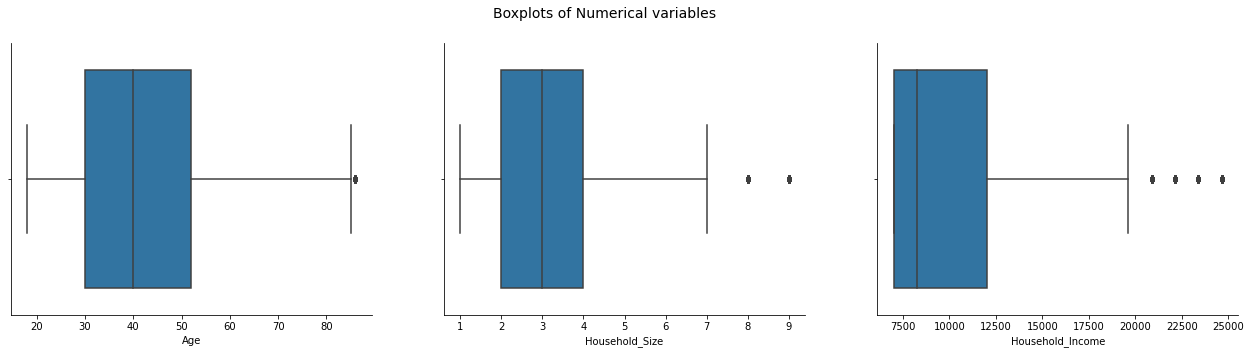

In [313]:
#Update vector of the numerical variables 
numerical= ['Age','Household_Size','Household_Income']



# Draw
fig, ax = plt.subplots(1, 3, figsize=(22,5))
for var, subplot in zip(X[numerical], ax.flatten()):
    g = sns.boxplot(data=X,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of Numerical variables", fontsize=plots_Title_fontSize)

Text(0.5, 0.98, 'Boxplots of Numerical variables')

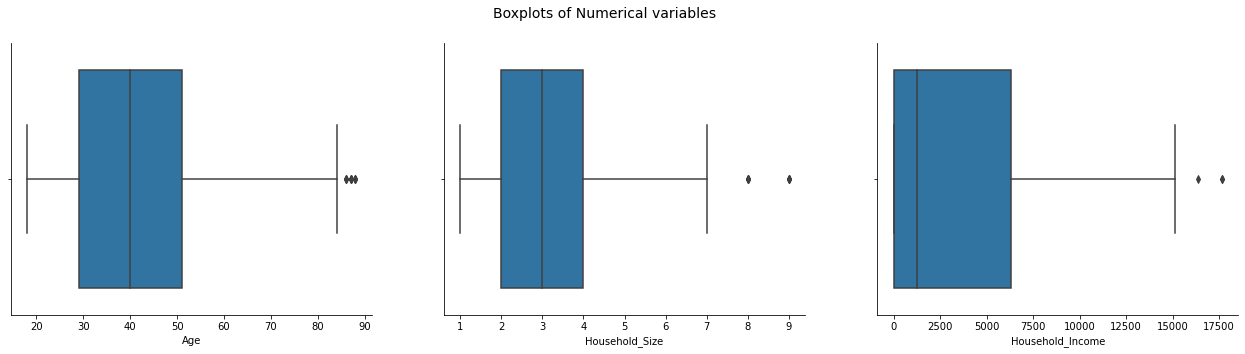

In [314]:

# Draw
fig, ax = plt.subplots(1, 3, figsize=(22,5))
for var, subplot in zip(X_test[numerical], ax.flatten()):
    g = sns.boxplot(data=X_test,
                 x=var,
                 ax=subplot)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of Numerical variables", fontsize=plots_Title_fontSize)

<b><font size="6">3. Modeling</font></b><br><br>

#### SPLIT OF THE DATA INTO TRAIN AND VALIDATION 

In [315]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, stratify=Y, shuffle=True)

In [316]:
X_svc_train, X_svc_val, Y_svc_train, Y_svc_val = train_test_split(X_svc, Y, test_size=0.25, stratify=Y, shuffle=True)

In [317]:
X_train.shape

(5925, 24)

In [318]:
X_train.columns

Index(['ID', 'ID_ORIGINAL', 'Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage_Low', 'Cellphone_Usage_Average',
       'Cellphone_Usage_High', 'Household_Size', 'Occupation_Government',
       'Occupation_Nothing', 'Occupation_Private company',
       'Occupation_Self-employed', 'Occupation_Public company',
       'Occupation_Student', 'Political_Participation_No involvement',
       'Political_Participation_Strong involvement',
       'Political_Participation_Some involvement',
       'Political_Participation_Unknown', 'Social_Person', 'Area_Residence',
       'Military_Service', 'Household_Income'],
      dtype='object')

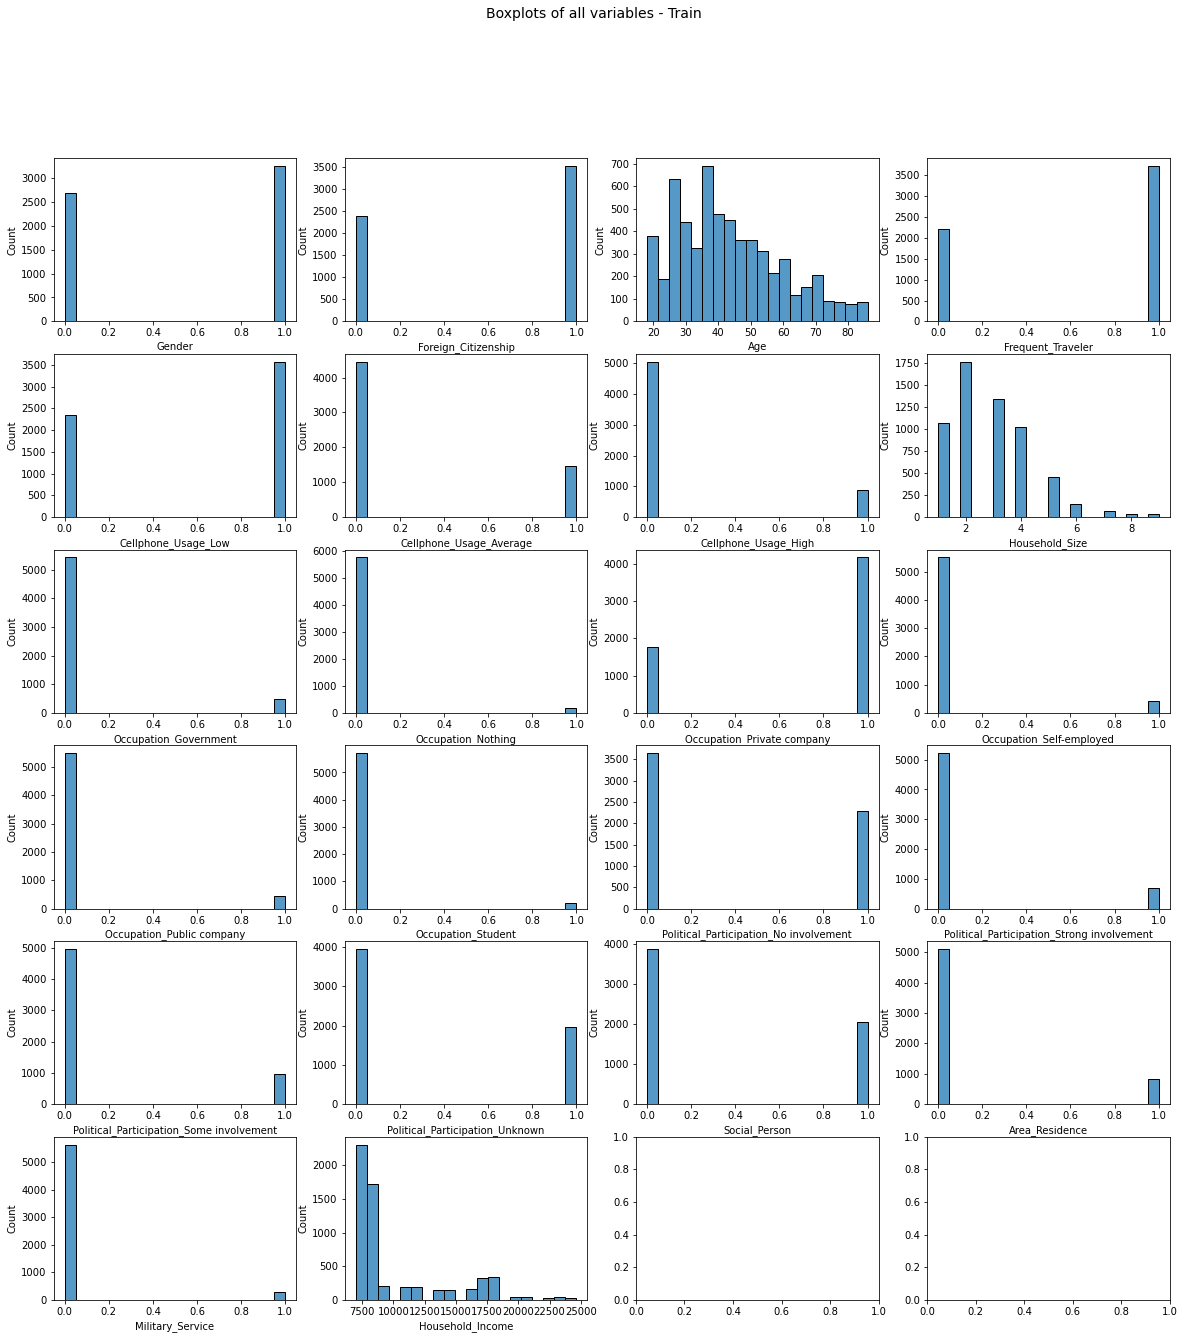

In [319]:
#Create a vector of the numerical variables 
columns =['Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage_Low', 'Cellphone_Usage_Average',
       'Cellphone_Usage_High', 'Household_Size', 'Occupation_Government',
       'Occupation_Nothing', 'Occupation_Private company',
       'Occupation_Self-employed', 'Occupation_Public company',
       'Occupation_Student', 'Political_Participation_No involvement',
       'Political_Participation_Strong involvement',
       'Political_Participation_Some involvement',
       'Political_Participation_Unknown', 'Social_Person', 'Area_Residence',
       'Military_Service', 'Household_Income']
#What is the behavior of numeric variables

fig, ax = plt.subplots(6, 4, figsize=(20,21))
for var, subplot in zip(X_train[columns], ax.flatten()):
    g = sns.histplot(data=X_train[columns],
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)
fig.suptitle("Boxplots of all variables - Train", fontsize=plots_Title_fontSize);

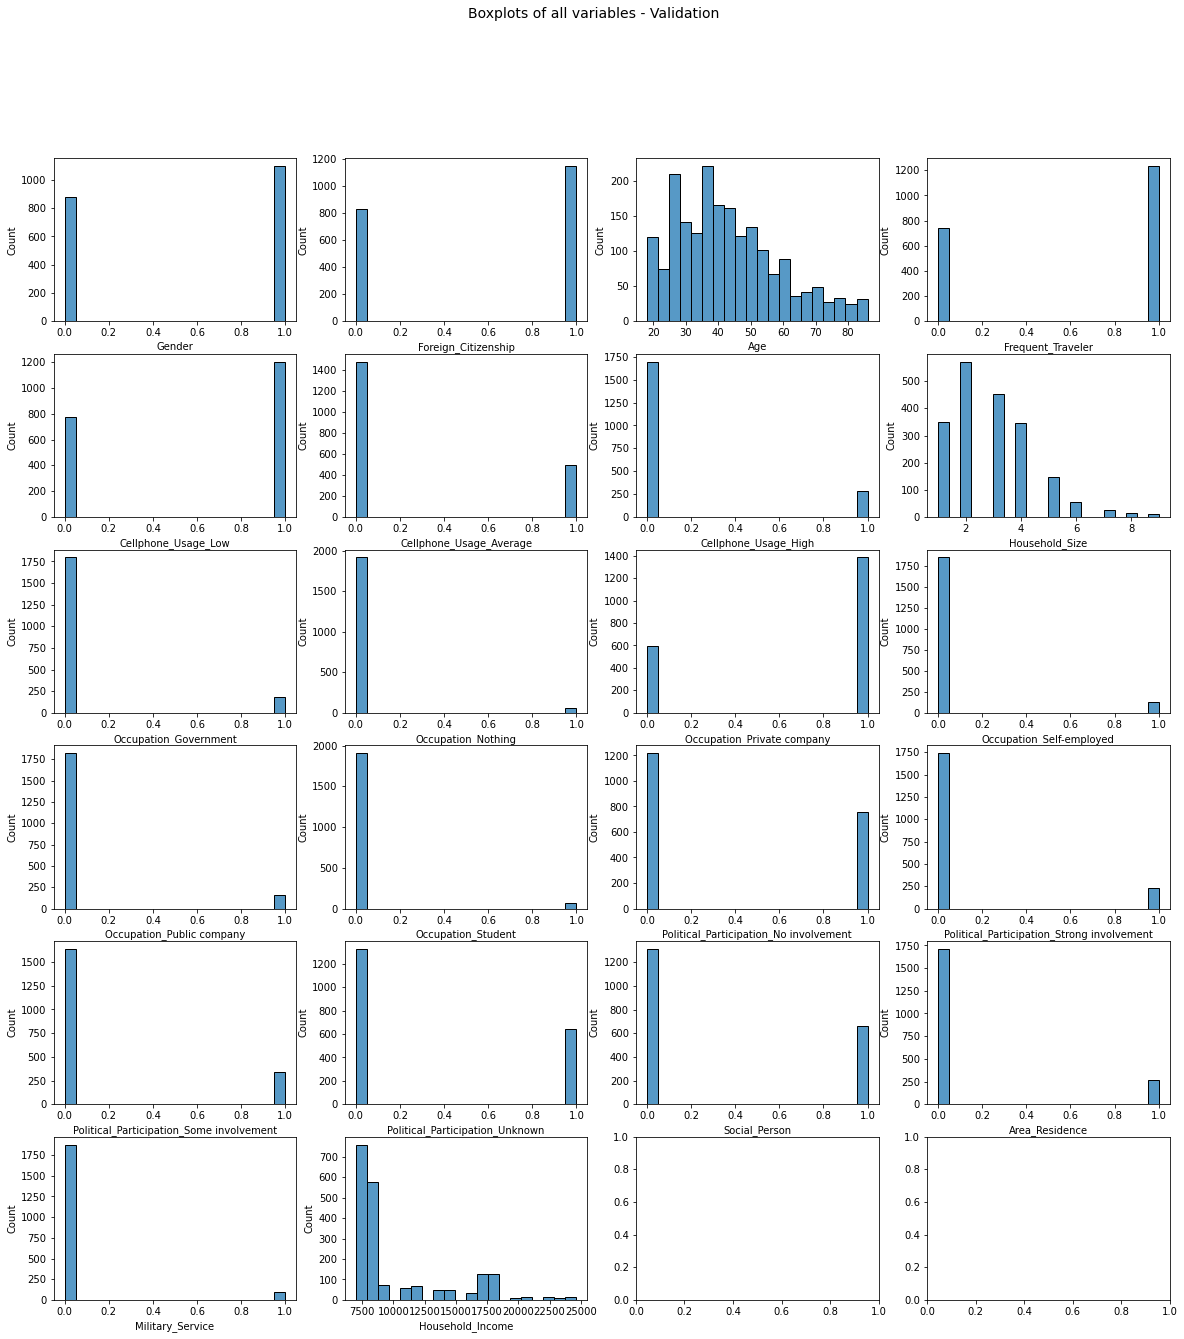

In [320]:
#Create a vector of the numerical variables 
columns =['Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage_Low', 'Cellphone_Usage_Average',
       'Cellphone_Usage_High', 'Household_Size', 'Occupation_Government',
       'Occupation_Nothing', 'Occupation_Private company',
       'Occupation_Self-employed', 'Occupation_Public company',
       'Occupation_Student', 'Political_Participation_No involvement',
       'Political_Participation_Strong involvement',
       'Political_Participation_Some involvement',
       'Political_Participation_Unknown', 'Social_Person', 'Area_Residence',
       'Military_Service', 'Household_Income']


#What is the behavior of numeric variables

fig, ax = plt.subplots(6, 4, figsize=(20,21))
for var, subplot in zip(X_val[columns], ax.flatten()):
    g = sns.histplot(data=X_val[columns],
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)
fig.suptitle("Boxplots of all variables - Validation", fontsize=plots_Title_fontSize);

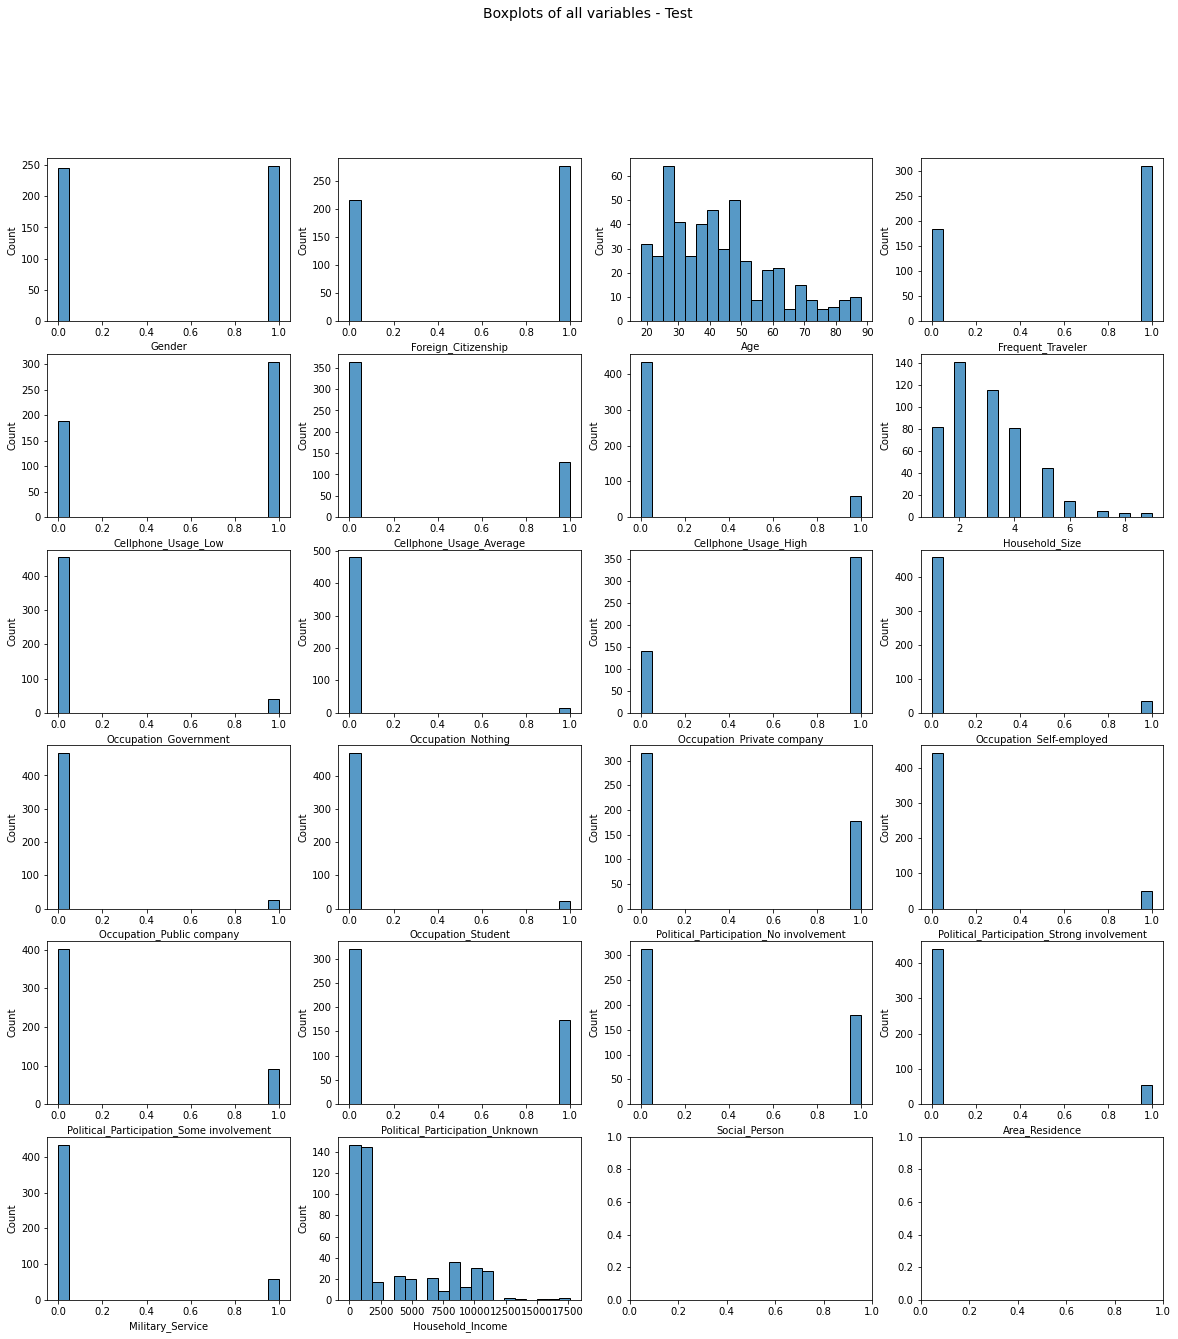

In [321]:
#Create a vector of the numerical variables 
columns =['Gender', 'Foreign_Citizenship', 'Age',
       'Frequent_Traveler', 'Cellphone_Usage_Low', 'Cellphone_Usage_Average',
       'Cellphone_Usage_High', 'Household_Size', 'Occupation_Government',
       'Occupation_Nothing', 'Occupation_Private company',
       'Occupation_Self-employed', 'Occupation_Public company',
       'Occupation_Student', 'Political_Participation_No involvement',
       'Political_Participation_Strong involvement',
       'Political_Participation_Some involvement',
       'Political_Participation_Unknown', 'Social_Person', 'Area_Residence',
       'Military_Service', 'Household_Income']

#What is the behavior of numeric variables

fig, ax = plt.subplots(6, 4, figsize=(20,21))
for var, subplot in zip(X_test[columns], ax.flatten()):
    g = sns.histplot(data=X_test[columns],
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)
fig.suptitle("Boxplots of all variables - Test", fontsize=plots_Title_fontSize);

## <font color='#0069222'> Feature Selection</font> <a class="anchor" id="import"></a> 

#### <font color='#0069222'>RFE</font>
<a class="anchor" id="anova"></a>

In [322]:
del X_train['ID'] 
del X_train['ID_ORIGINAL']

X_train.shape

(5925, 22)

In [323]:
del X_val['ID'] 
del X_val['ID_ORIGINAL']

X_val.shape

(1976, 22)

In [324]:
X_test.shape

(493, 24)

#### Model : LinearRegression()

In [325]:
model = LinearRegression()

In [326]:
rfe = RFE(estimator = model, n_features_to_select = 10)

In [327]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Gender,5925.0,0.548017,0.497731,0.0,0.0,1.0,1.0,1.0
Foreign_Citizenship,5925.0,0.595781,0.490782,0.0,0.0,1.0,1.0,1.0
Age,5925.0,43.132996,16.095507,18.0,30.0,40.0,53.0,86.0
Frequent_Traveler,5925.0,0.628186,0.483330,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Low,5925.0,0.602363,0.489451,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Average,5925.0,0.248776,0.432340,0.0,0.0,0.0,0.0,1.0
Cellphone_Usage_High,5925.0,0.148861,0.355981,0.0,0.0,0.0,0.0,1.0
Household_Size,5925.0,2.851139,1.487212,1.0,2.0,3.0,4.0,9.0
Occupation_Government,5925.0,0.084219,0.277740,0.0,0.0,0.0,0.0,1.0
Occupation_Nothing,5925.0,0.030886,0.173024,0.0,0.0,0.0,0.0,1.0


In [328]:
X_rfe = rfe.fit_transform(X = X_train, y = Y_train) 
X_rfe

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [329]:
data_rfe = pd.Series(rfe.support_, index = X_train.columns)
data_rfe = data_rfe[data_rfe == True]
data_rfe.index.tolist()

['Foreign_Citizenship',
 'Frequent_Traveler',
 'Cellphone_Usage_Low',
 'Cellphone_Usage_Average',
 'Cellphone_Usage_High',
 'Occupation_Government',
 'Occupation_Public company',
 'Occupation_Student',
 'Political_Participation_Unknown',
 'Area_Residence']

In [330]:
#Create dataset with only these columns

X_train_rfe=X_train[data_rfe.index.tolist()]


X_val_rfe=X_val[data_rfe.index.tolist()]

In [331]:
X_train_rfe.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Foreign_Citizenship,5925.0,0.595781,0.490782,0.0,0.0,1.0,1.0,1.0
Frequent_Traveler,5925.0,0.628186,0.483330,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Low,5925.0,0.602363,0.489451,0.0,0.0,1.0,1.0,1.0
Cellphone_Usage_Average,5925.0,0.248776,0.432340,0.0,0.0,0.0,0.0,1.0
Cellphone_Usage_High,5925.0,0.148861,0.355981,0.0,0.0,0.0,0.0,1.0
Occupation_Government,5925.0,0.084219,0.277740,0.0,0.0,0.0,0.0,1.0
Occupation_Public company,5925.0,0.073249,0.260567,0.0,0.0,0.0,0.0,1.0
Occupation_Student,5925.0,0.036456,0.187437,0.0,0.0,0.0,0.0,1.0
Political_Participation_Unknown,5925.0,0.332658,0.471205,0.0,0.0,0.0,1.0,1.0
Area_Residence,5925.0,0.138397,0.345345,0.0,0.0,0.0,0.0,1.0


In [332]:
print(pd.Series(rfe.support_,  index = X_train.columns))

Gender                                        False
Foreign_Citizenship                            True
Age                                           False
Frequent_Traveler                              True
Cellphone_Usage_Low                            True
Cellphone_Usage_Average                        True
Cellphone_Usage_High                           True
Household_Size                                False
Occupation_Government                          True
Occupation_Nothing                            False
Occupation_Private company                    False
Occupation_Self-employed                      False
Occupation_Public company                      True
Occupation_Student                             True
Political_Participation_No involvement        False
Political_Participation_Strong involvement    False
Political_Participation_Some involvement      False
Political_Participation_Unknown                True
Social_Person                                 False
Area_Residen

## <font color='#0069222'> KNN Classifier</font> <a class="anchor" id="import"></a> 

#### Model : KNeighborsClassifier()

In [333]:
modelKNN = KNeighborsClassifier()

In [334]:
modelKNN.fit(X = X_train_rfe, y = Y_train)

KNeighborsClassifier()

In [335]:
labels_train = modelKNN.predict(X_train_rfe)
labels_val = modelKNN.predict(X_val_rfe)

In [336]:
print('TRAIN', modelKNN.score(X_train_rfe, Y_train))
print('VALIDATION', modelKNN.score(X_val_rfe, Y_val))

TRAIN 0.7088607594936709
VALIDATION 0.7241902834008097


###### <font color='#0069222'> Methods in KNeighborsClassifier </font> <a class="anchor" id="import"></a> 

#### Model : KNeighborsClassifier()

In [337]:
modelKNN = KNeighborsClassifier()

In [338]:
modelKNN.fit(X = X_train, y = Y_train)

KNeighborsClassifier()

In [339]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)

In [340]:
modelKNN.score(X_train, Y_train)

0.7880168776371308

In [341]:
modelKNN.score(X_val, Y_val)

0.6938259109311741

#### <font color='#0069222'> Attributes in KNeighborsClassifier </font> <a class="anchor" id="import"></a>  

In [342]:
modelKNN.classes_

array([0, 1], dtype=int64)

In [343]:
modelKNN.effective_metric_

'euclidean'

In [344]:
modelKNNM = KNeighborsClassifier(metric='euclidean')

In [345]:
modelKNNM.fit(X = X_train, y = Y_train)

KNeighborsClassifier(metric='euclidean')

In [346]:
modelKNNM.score(X_train, Y_train)

0.7880168776371308

In [347]:
modelKNNM.score(X_val, Y_val)

0.6938259109311741

In [348]:
#### List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,30))
#p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsClassifier()
#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
#best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

### <font color='#0069222'> SVC </font> <a class="anchor" id="import"></a> 

In [349]:
svc = SVC(kernel='poly',probability=True, class_weight='balanced', verbose=True)
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)

[LibSVM]

0.5179746835443038

In [350]:
svc.score(X_val, Y_val)

0.5227732793522267

In [493]:
bagging_svc = BaggingClassifier(base_estimator =  SVC(kernel='poly',probability=False, class_weight='balanced')
                                , bootstrap = True)

In [494]:
bagging_svc.fit(X = X_train, y = Y_train)

BaggingClassifier(base_estimator=SVC(class_weight='balanced', kernel='poly'))

In [495]:
bagging_svc.score(X_train, Y_train)

0.5179746835443038

In [496]:
bagging_svc.score(X_val, Y_val)

0.5237854251012146

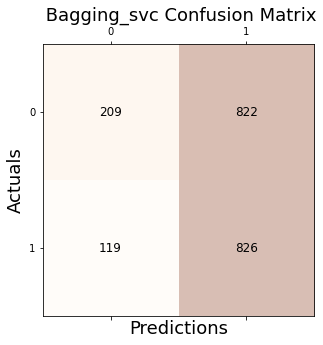

In [497]:
# Get the predictions
#
Y_pred = bagging_svc.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' Bagging_svc Confusion Matrix', fontsize=18)
plt.show()

In [492]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.522
Recall: 0.000
precision_score: 0.000
f1_score: 0.000


#### <font color='#0069222'> SVC Scaled </font> <a class="anchor" id="import"></a>  

In [357]:
svc.fit(X_svc_train, Y_svc_train)
svc.score(X_svc_train, Y_svc_train)

[LibSVM]

0.4783122362869198

In [358]:
svc.score(X_svc_val, Y_svc_val)

0.4782388663967611

In [359]:
bagging_svc.fit(X = X_svc_train, y = Y_svc_train)
bagging_svc.score(X_svc_train, Y_svc_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

0.5216877637130801

In [360]:
bagging_svc.score(X_svc_val, Y_svc_val)

0.5217611336032388

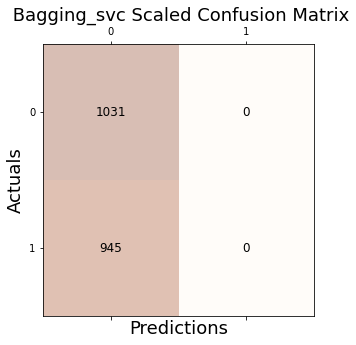

In [484]:
sc = StandardScaler()
sc.fit(X_svc_train)
X_train_std = sc.transform(X_svc_train)
X_test_std = sc.transform(X_svc_val)
#
# Fit the SVC model
#
svc = SVC(kernel='poly',probability=True)
svc.fit(X_svc_train, Y_svc_train)
#
# Get the predictions
#
Y_pred = bagging_svc.predict(X_svc_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_svc_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' Bagging_svc Scaled Confusion Matrix', fontsize=18)
plt.show()

In [485]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.522
Recall: 0.000
precision_score: 0.000
f1_score: 0.000


## <font color='#0069222'> Neural Networks </font> <a class="anchor" id="import"></a> 

#### Model : MLPClassifier()

In [363]:
modelMLPC = MLPClassifier()
#df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw'])
#show_results(df, model)

In [364]:
#bagging 

bagging_MLPC = BaggingClassifier(base_estimator = modelMLPC)

In [365]:
bagging_MLPC.fit(X = X_train, y = Y_train)

BaggingClassifier(base_estimator=MLPClassifier())

In [366]:
bagging_MLPC.score(X = X_train, y = Y_train)

0.6406751054852321

In [367]:
bagging_MLPC.score(X = X_val, y = Y_val)

0.6472672064777328

In [368]:
bagging_MLPC.estimators_

[MLPClassifier(random_state=1176368915),
 MLPClassifier(random_state=1012833140),
 MLPClassifier(random_state=441738472),
 MLPClassifier(random_state=348178126),
 MLPClassifier(random_state=214586125),
 MLPClassifier(random_state=163007930),
 MLPClassifier(random_state=932630510),
 MLPClassifier(random_state=720739541),
 MLPClassifier(random_state=98487580),
 MLPClassifier(random_state=283040685)]

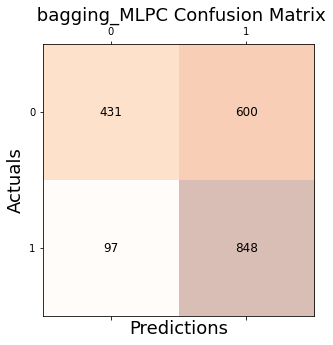

In [369]:
# Get the predictions
#
Y_pred = bagging_MLPC.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' bagging_MLPC Confusion Matrix', fontsize=18)
plt.show()

In [370]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.647
Recall: 0.897
precision_score: 0.586
f1_score: 0.709


In [371]:
#From the 3 models below, after some tests we decided to use the medium, 
#because it  gives the best score in comparison to the other two.
# activation='logistic',

#model_simple = MLPClassifier(hidden_layer_sizes=(1))
model_medium = MLPClassifier(hidden_layer_sizes=(100), solver='sgd', learning_rate='adaptive')
#model_complex = MLPClassifier(hidden_layer_sizes = (100,100,100,100))

In [372]:
#df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Simple','Medium','Complex'])
#show_results(df, model_simple, model_medium, model_complex)

df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Medium'])
show_results(df, model_medium)

,Time,Train,Val,Iterations
Medium,1.251+/-0.02,0.522+/-0.0,0.522+/-0.02,67.0+/-0.0


In [373]:
model_medium = MLPClassifier(hidden_layer_sizes=(100), solver='sgd', learning_rate='adaptive')

model_medium.fit(X_train,Y_train)
model_medium.score(X_train,Y_train)

0.5216877637130801

In [374]:
model_medium.score(X_val,Y_val)

0.5217611336032388

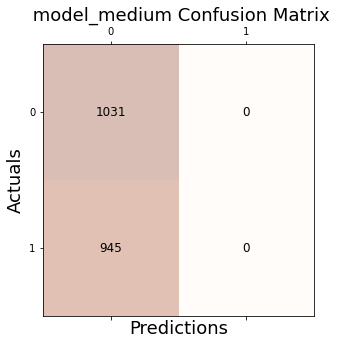

In [375]:
# Get the predictions
#
Y_pred = model_medium.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' model_medium Confusion Matrix', fontsize=18)
plt.show()

In [376]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.522
Recall: 0.000
precision_score: 0.000
f1_score: 0.000


In [377]:
#MODELO MPClassifier com learning rate invscaling... Resultado 0.57... Out - Não utilizar

#model = MLPClassifier(solver='sgd', learning_rate='invscaling')
#df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw'])
#show_results(df, model)

In [378]:
#Modelo MPClassifier com learning rate adaptive. 

#model_adapt = MLPClassifier(solver='sgd', learning_rate='adaptive', hidden_layer_sizes = (11))
#df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw'])
#show_results(df, model_adapt)

In [379]:
#Modelo MPClassifier com solver adam. 

model_adam = MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes = (100, 100))
df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw'])
show_results(df, model_adam)

,Time,Train,Val,Iterations
Raw,1.066+/-0.24,0.511+/-0.02,0.502+/-0.03,16.4+/-4.1


#### <font color='#0069222'>Grid Search</font>
<a class="anchor" id="anova"></a>

In [380]:
#parameter_space = {
 #   'hidden_layer_sizes': [(50,50,50), (100,)],
 #   'activation': ['tanh', 'relu'],
 #   'solver': ['sgd', 'adam'],
 #   'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
#}

In [381]:
#clf = GridSearchCV(model, parameter_space)

In [382]:
#clf.fit(X_train, Y_train)

## <font color='#0069222'> Decision Tree</font> <a class="anchor" id="import"></a> 

##### Model: DecisionTreeClassifier()

In [383]:
scores_train = []
scores_test = []
maxdepth_list = range(1,10)

for i in maxdepth_list:
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, Y_train)
    scores_train.append(DTC.score(X_train, Y_train))
    scores_test.append(DTC.score(X_val, Y_val))

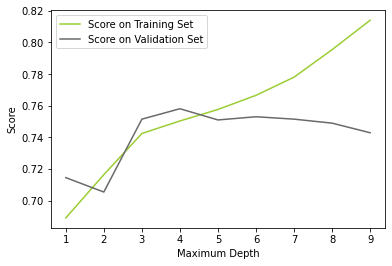

In [384]:
plt.plot(maxdepth_list, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(maxdepth_list, scores_test, label="Score on Validation Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [385]:
scores_train = []
scores_val = []
minsamples_list = range(30, 200)

for i in minsamples_list:
    DTR = DecisionTreeClassifier(min_samples_split=i)
    DTR.fit(X_train, Y_train)
    scores_train.append(DTR.score(X_train, Y_train))
    scores_val.append(DTR.score(X_val, Y_val))

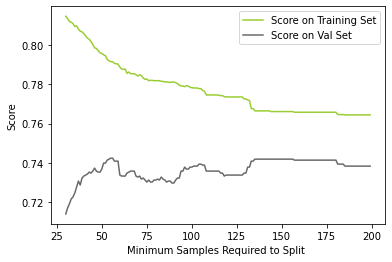

In [386]:
plt.plot(minsamples_list, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(minsamples_list, scores_val, label="Score on Val Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split ")
plt.ylabel("Score")
plt.legend()
plt.show()

In [387]:
scores_train = []
scores_val = []
min_samples_leaf = range(30, 200)

for i in min_samples_leaf:
    DTR = DecisionTreeClassifier(min_samples_leaf=i)
    DTR.fit(X_train, Y_train)
    scores_train.append(DTR.score(X_train, Y_train))
    scores_val.append(DTR.score(X_val, Y_val))

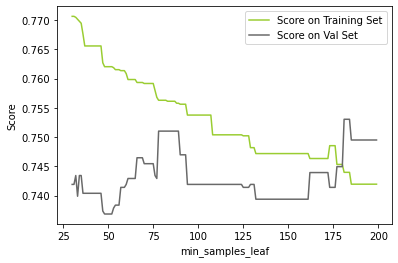

In [388]:
plt.plot(min_samples_leaf, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(min_samples_leaf, scores_val, label="Score on Val Set", color='dimgray')
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.legend()
plt.show()

In [389]:
modelDT_TF = DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=4, 
    min_samples_split=100, 
    min_samples_leaf=150, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight='balanced', 
    ccp_alpha=0.0)

In [390]:
modelDT_TF.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=150, min_samples_split=100)

In [391]:
modelDT_TF.score(X_train, Y_train)

0.7419409282700422

In [392]:
modelDT_TF.score(X_val, Y_val)

0.7494939271255061

In [393]:
#clf.best_params_

In [394]:
#final_model = clf.best_estimator_.fit(X_train, Y_train)
#print('Train:', final_model.score(X_train, Y_train))
#print('Val:', final_model.score(X_val, Y_val))

In [395]:
modelDT_TF.feature_importances_

array([0.00439983, 0.        , 0.17984288, 0.11410533, 0.4843295 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20583916, 0.        , 0.        ,
       0.        , 0.01148329])

In [396]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(7,10))
    plt.barh(range(n_features), model.feature_importances_, color='lightblue')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

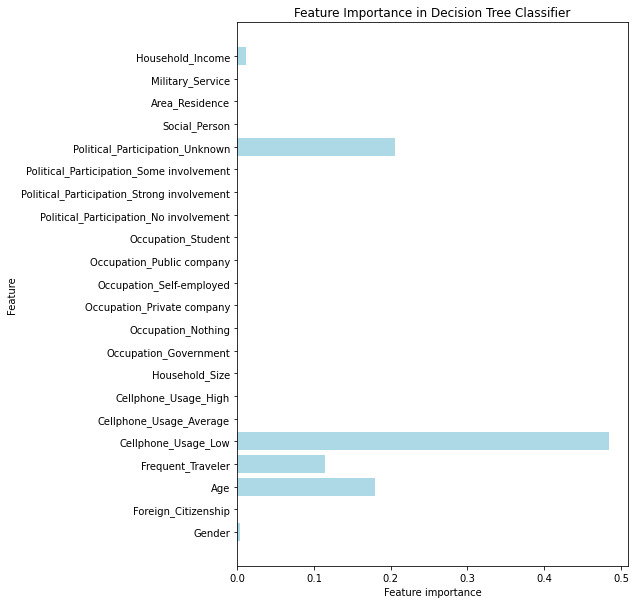

In [397]:
plot_feature_importances(modelDT_TF)

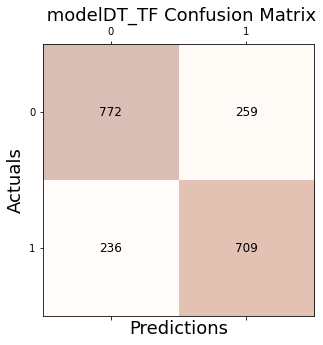

In [398]:
# Get the predictions
#
Y_pred = modelDT_TF.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' modelDT_TF Confusion Matrix', fontsize=18)
plt.show()

In [399]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.749
Recall: 0.750
precision_score: 0.732
f1_score: 0.741


## <font color='#0069222'> Ensemble Classification </font> <a class="anchor" id="import"></a> 

In [400]:
bagging_DT = BaggingClassifier(base_estimator = DecisionTreeClassifier())

In [401]:
bagging_DT.fit(X = X_train, y = Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [402]:
bagging_DT.score(X_val, Y_val)

0.7100202429149798

In [403]:
y_pred_bagging = bagging_DT.predict(X_val)

In [404]:
y_pred_bagging

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

#### <font color='#0088888'>Attributes in BaggingClassifier</font>

In [405]:
bagging_DT.estimators_

[DecisionTreeClassifier(random_state=490622433),
 DecisionTreeClassifier(random_state=1748037559),
 DecisionTreeClassifier(random_state=386365198),
 DecisionTreeClassifier(random_state=1515580579),
 DecisionTreeClassifier(random_state=2024577595),
 DecisionTreeClassifier(random_state=386197620),
 DecisionTreeClassifier(random_state=1832180418),
 DecisionTreeClassifier(random_state=1782546840),
 DecisionTreeClassifier(random_state=1614049553),
 DecisionTreeClassifier(random_state=1746083457)]

In [406]:
bagging_DT.estimators_samples_

[array([3553, 4546, 4835, ..., 3278, 3578,  902]),
 array([4023, 1880,  445, ..., 4434, 2607, 5370]),
 array([5902,  978, 5109, ..., 5191, 3441, 1730]),
 array([3235,  503, 1072, ..., 2834, 3069, 3949]),
 array([3971,  790, 2646, ..., 4978, 1394, 1672]),
 array([2164, 5512, 5306, ..., 2679, 5319, 3820]),
 array([5539, 4943, 2587, ..., 2719,  675,  221]),
 array([ 408, 4652, 3886, ..., 4223, 2925,  645]),
 array([4369, 2254,  128, ..., 2989,  779,  882]),
 array([3428, 4943, 3811, ..., 1333,  732,  400])]

#### <font color='#0088888'>Parameters in BaggingClassifier</font>

##### Model : RandomForestClassifier()

In [407]:
modelRF = RandomForestClassifier()

In [408]:
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

In [409]:
modelRF.score(X_train, Y_train)

0.9767088607594937

In [410]:
len(modelRF.estimators_)

100

In [411]:
modelRF.score(X_val, Y_val)

0.7241902834008097

In [412]:
scores_train = []
scores_val = []
max_depth = range(1, 10)

for i in max_depth:
    DTR = RandomForestClassifier(max_depth=i)
    DTR.fit(X_train, Y_train)
    scores_train.append(DTR.score(X_train, Y_train))
    scores_val.append(DTR.score(X_val, Y_val))

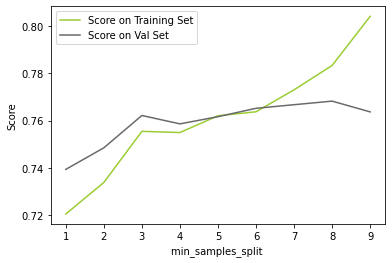

In [413]:
plt.plot(max_depth, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(max_depth, scores_val, label="Score on Val Set", color='dimgray')
plt.xlabel("min_samples_split ")
plt.ylabel("Score")
plt.legend()
plt.show()

In [467]:
modelRF_H = RandomForestClassifier(n_estimators=15, criterion='gini', min_samples_split=2, max_depth=3)

In [468]:
modelRF_H.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [469]:
modelRF_H.score(X_train, Y_train)

0.7471729957805907

In [470]:
modelRF_H.score(X_val, Y_val)

0.7489878542510121

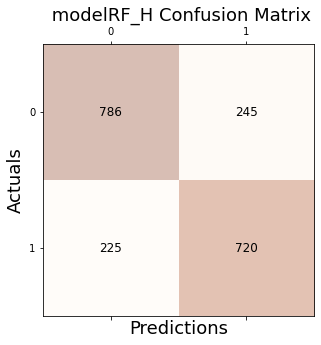

In [459]:
# Get the predictions
#
Y_pred = modelRF_H.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' modelRF_H Confusion Matrix', fontsize=18)
plt.show()

In [460]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.762
Recall: 0.762
precision_score: 0.746
f1_score: 0.754


#### <font color='#0088888'> Boosting </font> <a class="anchor" id="import"></a> 

In [461]:
aboost = AdaBoostClassifier()

In [421]:
aboost.fit(X_train, Y_train)

AdaBoostClassifier()

In [422]:
aboost.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=78385893),
 DecisionTreeClassifier(max_depth=1, random_state=1320890079),
 DecisionTreeClassifier(max_depth=1, random_state=1958291831),
 DecisionTreeClassifier(max_depth=1, random_state=100794502),
 DecisionTreeClassifier(max_depth=1, random_state=1873198490),
 DecisionTreeClassifier(max_depth=1, random_state=2101517885),
 DecisionTreeClassifier(max_depth=1, random_state=1347547414),
 DecisionTreeClassifier(max_depth=1, random_state=1343554861),
 DecisionTreeClassifier(max_depth=1, random_state=1673500702),
 DecisionTreeClassifier(max_depth=1, random_state=723449630),
 DecisionTreeClassifier(max_depth=1, random_state=1098221390),
 DecisionTreeClassifier(max_depth=1, random_state=748140561),
 DecisionTreeClassifier(max_depth=1, random_state=757214849),
 DecisionTreeClassifier(max_depth=1, random_state=1498973757),
 DecisionTreeClassifier(max_depth=1, random_state=640797311),
 DecisionTreeClassifier(max_depth=1, random_state=1910410719),

In [423]:
aboost.score(X_train, Y_train)


0.7476793248945147

In [424]:
aboost.score(X_val, Y_val)

0.7454453441295547

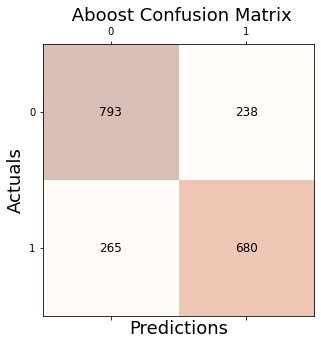

In [425]:
# Get the predictions
#
Y_pred = aboost.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' Aboost Confusion Matrix', fontsize=18)
plt.show()

In [426]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.745
Recall: 0.720
precision_score: 0.741
f1_score: 0.730


In [427]:
bagging_aboost = BaggingClassifier(base_estimator = AdaBoostClassifier())

In [428]:
bagging_aboost.fit(X_train, Y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier())

In [429]:
bagging_aboost.score(X_train, Y_train)

0.7483544303797468

In [430]:
bagging_aboost.score(X_val, Y_val)

0.7419028340080972

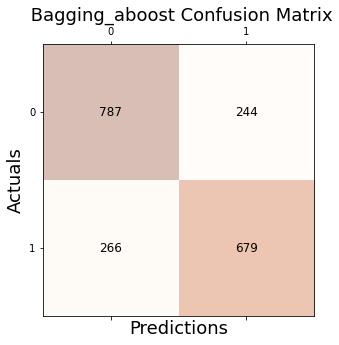

In [431]:
# Get the predictions
#
Y_pred = bagging_aboost.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' Bagging_aboost Confusion Matrix', fontsize=18)
plt.show()

In [432]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.742
Recall: 0.719
precision_score: 0.736
f1_score: 0.727


##### <font color='#0088888'> AdaBoost Com parametros especificos</font> <a class="anchor" id="import"></a> 

In [433]:
aboost_H = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=3, 
    min_samples_split=185, 
    min_samples_leaf=70, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight='balanced', 
    ccp_alpha=0.0), learning_rate=0.003)

In [434]:
aboost_H.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         min_samples_leaf=70,
                                                         min_samples_split=185),
                   learning_rate=0.003)

In [435]:
aboost_H.score(X_train, Y_train)

0.7436286919831223

In [436]:
aboost_H.score(X_val, Y_val)

0.7510121457489879

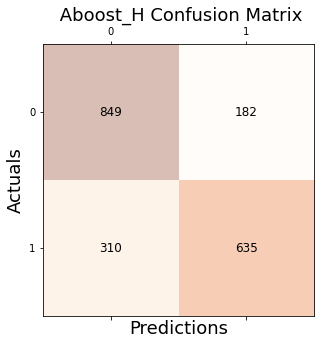

In [437]:
# Get the predictions
#
Y_pred = aboost_H.predict(X_val)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=Y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' Aboost_H Confusion Matrix', fontsize=18)
plt.show()

In [438]:
print('accuracy_score: %.3f' % accuracy_score(Y_val, Y_pred))
print('Recall: %.3f' % recall_score(Y_val, Y_pred))
print('precision_score: %.3f' % precision_score(Y_val, Y_pred))
print('f1_score: %.3f' % f1_score(Y_val, Y_pred))

accuracy_score: 0.751
Recall: 0.672
precision_score: 0.777
f1_score: 0.721


### <font color='#0088888'> Tests </font> <a class="anchor" id="import"></a> 

#### <font color='#0088888'>Compare all models</font>

In [439]:
accuracies_test = [bagging_MLPC.score(X_val, Y_val)
                   , modelDT_TF.score(X_val, Y_val), modelRF_H.score(X_val, Y_val)
                   , aboost.score(X_val, Y_val), bagging_aboost.score(X_val, Y_val)
                   , aboost_H.score(X_val, Y_val), model_medium.score(X_val, Y_val)]              
                   
accuracies_train = [bagging_MLPC.score(X_train, Y_train), modelDT_TF.score(X_train, Y_train),  
                    modelRF_H.score(X_train, Y_train), aboost.score(X_train, Y_train), 
                    bagging_aboost.score(X_train, Y_train), aboost_H.score(X_train, Y_train), model_medium.score(X_train, Y_train)]


models = ['B-MLPC','DT-TF', 'RF-H','AB','B-AB','AB-H', 'MLPC']
data_tuples = list(zip(models,accuracies_test))
data_test = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)



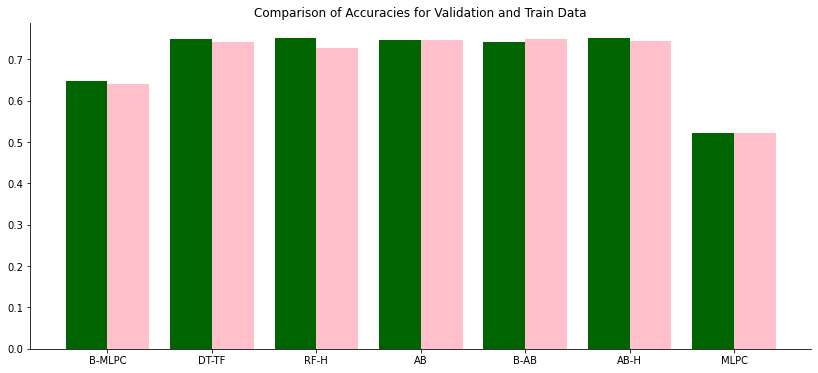

In [507]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='darkgreen', label='Validation Accuracy')
ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='pink', label='Train Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for Validation and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)
plt.show()

# <font color='#0088888'> Predictions for the test dataset </font> <a class="anchor" id="import"></a> 

In [471]:
bagging_aboost.score(X_train, Y_train)

0.7483544303797468

In [472]:
bagging_aboost.score(X_val, Y_val)

0.7419028340080972

In [464]:
#MAKE THE PREDICTIONS

df_test = X_test.drop(columns = ['ID','ID_ORIGINAL'])

pred = bagging_aboost.predict(df_test)

df_pred_test = X_test[["ID_ORIGINAL"]]

df_pred_test["Spy"] = pred

In [465]:
df_pred_test[df_pred_test['Spy']==1].count()

ID_ORIGINAL    208
Spy            208
dtype: int64

In [466]:
df_pred_test

,ID_ORIGINAL,Spy
0,460139,0
1,460648,0
2,460835,0
3,461613,0
4,461721,0
...,...,...
488,473596,0
489,477769,1
490,475292,1
491,472997,1


In [449]:
X_test.shape

(493, 24)

In [450]:
X.shape

(7901, 24)

In [451]:
df_pred_test.to_csv(r'spies_test_bagging_MLPC.csv', index = False, na_rep=0)